## Business problem

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
import xgboost
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Moudles related to feature selection
from sklearn.feature_selection import RFE,f_regression

## Create UDFs

In [2]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

## Import Data

In [3]:
# Read train data
train= pd.read_csv('E:/DataTrained/Intership_Flip Robo/Projects/Project-Housing_splitted/train.csv')
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [4]:
# Read test data
test= pd.read_csv('E:/DataTrained/Intership_Flip Robo/Projects/Project-Housing_splitted/test.csv')
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

## Data Inspection

In [5]:
#profile = pandas_profiling.ProfileReport(train)
#profile.to_widgets()

In [6]:
# Train data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
# Test data information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

###### There are a lot of missing values

In [8]:
# Check data types 
train['MSSubClass']=train['MSSubClass'].astype('category')
test['MSSubClass']=test['MSSubClass'].astype('category')

------------------------------------------------------------------------------------------------------------------------------

In [9]:
# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
# check again the data size after dropping the 'Id' variable
print(f'The train data size after dropping Id feature is : {train.shape}') 
print(f'\nThe test data size after dropping Id feature is : {test.shape}')

The train data size after dropping Id feature is : (1168, 80)

The test data size after dropping Id feature is : (292, 79)


In [10]:
# Missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1161  0.994007
MiscFeature    1124  0.962329
Alley          1091  0.934075
Fence           931  0.797089
FireplaceQu     551  0.471747
LotFrontage     214  0.183219
GarageCond       64  0.054795
GarageQual       64  0.054795
GarageType       64  0.054795
GarageFinish     64  0.054795
GarageYrBlt      64  0.054795
BsmtExposure     31  0.026541
BsmtFinType2     31  0.026541
BsmtQual         30  0.025685
BsmtCond         30  0.025685
BsmtFinType1     30  0.025685
MasVnrType        7  0.005993
MasVnrArea        7  0.005993
MSSubClass        0  0.000000
Fireplaces        0  0.000000

In [11]:
# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], inplace = True)
test.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], inplace = True)
# check again the data size after dropping the 'Id' variable
print(f'The train data size after dropping Id feature is : {train.shape}') 
print(f'\nThe test data size after dropping Id feature is : {test.shape}')

The train data size after dropping Id feature is : (1168, 74)

The test data size after dropping Id feature is : (292, 73)


In [12]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [13]:
train.isin(['NAN','NA','N/A','-',' ','?']).sum().any()

False

In [14]:
train.isin(['NAN','NA','N/A','-',' ','?',np.nan]).sum().any()

True

In [15]:
# Check Duplicated records
# Train data 
print(train.duplicated().sum())

# Test data 
test.duplicated().sum()

0


0

###### There are no duplicated records

-------------------------------------------------------------------------------------------------------------------------------

In [16]:
# Handling np.nan values
def missing_value_treat(x):
    if ((x.dtype=='float64') or (x.dtype=='int64')):
        x=x.fillna(x.median())
    else:
        x=x.fillna(x.mode()[0])
        
    return x  

In [17]:
# filling the nan values with the 3M values
train=train.apply(missing_value_treat)
test=test.apply(missing_value_treat)

In [18]:
# Missing train data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
MSSubClass        0      0.0
GarageYrBlt       0      0.0
Fireplaces        0      0.0
Functional        0      0.0
TotRmsAbvGrd      0      0.0
KitchenQual       0      0.0
KitchenAbvGr      0      0.0
BedroomAbvGr      0      0.0
HalfBath          0      0.0
FullBath          0      0.0
BsmtHalfBath      0      0.0
BsmtFullBath      0      0.0
GrLivArea         0      0.0
LowQualFinSF      0      0.0
2ndFlrSF          0      0.0
1stFlrSF          0      0.0
Electrical        0      0.0
GarageType        0      0.0
GarageFinish      0      0.0
MSZoning          0      0.0

In [19]:
# Missing test data
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
MSSubClass        0      0.0
HeatingQC         0      0.0
Fireplaces        0      0.0
Functional        0      0.0
TotRmsAbvGrd      0      0.0
KitchenQual       0      0.0
KitchenAbvGr      0      0.0
BedroomAbvGr      0      0.0
HalfBath          0      0.0
FullBath          0      0.0
BsmtHalfBath      0      0.0
BsmtFullBath      0      0.0
GrLivArea         0      0.0
LowQualFinSF      0      0.0
2ndFlrSF          0      0.0
1stFlrSF          0      0.0
Electrical        0      0.0
GarageType        0      0.0
GarageYrBlt       0      0.0
GarageFinish      0      0.0

###### There are no more Null Values in the Data.

-------------------------------------------------------------------------------------------------------------------------------

In [20]:
# split train data to continous and categorical varaiables.
num_train=train.select_dtypes(include=['float64','int64'])
cat_train=train.select_dtypes(include=['object'])

In [21]:
# split test data to continous and categorical varaiables.
num_test=test.select_dtypes(include=['float64','int64'])
cat_test=test.select_dtypes(include=['object'])

In [22]:
# Descriptive analysis for continous data
num_train.apply(continuous_var_summary)

LotArea  OverallQual  OverallCond     YearBuilt  YearRemodAdd  \
N       1.168000e+03  1168.000000  1168.000000  1.168000e+03  1.168000e+03   
NMISS   0.000000e+00     0.000000     0.000000  0.000000e+00  0.000000e+00   
SUM     1.224619e+07  7130.000000  6536.000000  2.302047e+06  2.318198e+06   
MEAN    1.048475e+04     6.104452     5.595890  1.970931e+03  1.984759e+03   
MEDIAN  9.522500e+03     6.000000     5.000000  1.972000e+03  1.993000e+03   
STD     8.957442e+03     1.390153     1.124343  3.014526e+01  2.078519e+01   
VAR     8.023577e+07     1.932525     1.264148  9.087364e+02  4.320239e+02   
MIN     1.300000e+03     1.000000     1.000000  1.875000e+03  1.950000e+03   
P1      1.883070e+03     3.000000     3.000000  1.900000e+03  1.950000e+03   
P5      3.420700e+03     4.000000     4.000000  1.916000e+03  1.950000e+03   
P10     5.298300e+03     5.000000     5.000000  1.924000e+03  1.950000e+03   
P25     7.621500e+03     5.000000     5.000000  1.954000e+03  1.966000e+03   
P50     9.522500e+03     6.000000     5.000000  1.972000e+03  1.993000e+03   
P75     1.151550e+04     7.000000     6.000000  2.000000e+03  2.004000e+03   
P90     1.431140e+04     8.000000     7.000000  2.006000e+03  2.007000e+03   
P95     1.747305e+04     8.000000     8.000000  2.007000e+03  2.007000e+03   
P99     3.686352e+04    10.000000     9.000000  2.009000e+03  2.009000e+03   
MAX     1.646600e+05    10.000000     9.000000  2.010000e+03  2.010000e+03   

           MasVnrArea     BsmtFinSF1    BsmtFinSF2      BsmtUnfSF  \
N         1168.000000    1168.000000   1168.000000    1168.000000   
NMISS        0.000000       0.000000      0.000000       0.000000   
SUM     118782.000000  519440.000000  54484.000000  665435.000000   
MEAN       101.696918     444.726027     46.647260     569.721747   
MEDIAN       0.000000     385.500000      0.000000     474.000000   
STD        182.218483     462.664785    163.520016     449.375525   
VAR      33203.575586  214058.702938  26738.795777  201938.362097   
MIN          0.000000       0.000000      0.000000       0.000000   
P1           0.000000       0.000000      0.000000       0.000000   
P5           0.000000       0.000000      0.000000       0.000000   
P10          0.000000       0.000000      0.000000      60.700000   
P25          0.000000       0.000000      0.000000     216.000000   
P50          0.000000     385.500000      0.000000     474.000000   
P75        160.000000     714.500000      0.000000     816.000000   
P90        320.000000    1070.300000    118.200000    1240.000000   
P95        449.950000    1281.300000    378.950000    1468.000000   
P99        802.600000    1583.890000    869.990000    1800.000000   
MAX       1600.000000    5644.000000   1474.000000    2336.000000   

         TotalBsmtSF  ...     WoodDeckSF   OpenPorchSF  EnclosedPorch  \
N       1.168000e+03  ...    1168.000000   1168.000000    1168.000000   
NMISS   0.000000e+00  ...       0.000000      0.000000       0.000000   
SUM     1.239359e+06  ...  112369.000000  54382.000000   26882.000000   
MEAN    1.061095e+03  ...      96.206336     46.559932      23.015411   
MEDIAN  1.005500e+03  ...       0.000000     24.000000       0.000000   
STD     4.422722e+02  ...     126.158988     66.381023      63.191089   
VAR     1.956047e+05  ...   15916.090208   4406.440278    3993.113730   
MIN     0.000000e+00  ...       0.000000      0.000000       0.000000   
P1      0.000000e+00  ...       0.000000      0.000000       0.000000   
P5      5.217500e+02  ...       0.000000      0.000000       0.000000   
P10     6.419000e+02  ...       0.000000      0.000000       0.000000   
P25     7.990000e+02  ...       0.000000      0.000000       0.000000   
P50     1.005500e+03  ...       0.000000     24.000000       0.000000   
P75     1.291500e+03  ...     171.000000     70.000000       0.000000   
P90     1.594300e+03  ...     261.300000    132.000000     112.000000   
P95     1.752650e+03  ...     341.300000    170.00

In [23]:
# Descriptive analysis for categorical data
cat_train.describe(include='O')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1168   1168     1168        1168      1168      1168      1168   
unique        5      2        4           4         1         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq        928   1164      740        1046      1168       842      1105   

       Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
count          1168       1168       1168  ...       1168        1168   
unique           25          9          8  ...          5           4   
top           NAmes       Norm       Norm  ...      SBrkr          TA   
freq            182       1005       1154  ...       1070         578   

       Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count        1168       1168         1168       1168       1168       1168   
unique          7          6            3          5          5          3   
top           Typ     Attchd          Unf         TA         TA          Y   
freq         1085        755          551       1114       1125       1071   

       SaleType SaleCondition  
count      1168          1168  
unique        9             6  
top          WD        Normal  
freq        999           945  

[4 rows x 38 columns]

In [24]:
# Descriptive analysis for test continous data
num_test.apply(continuous_var_summary)

LotArea  OverallQual  OverallCond      YearBuilt   YearRemodAdd  \
N       2.920000e+02   292.000000   292.000000     292.000000     292.000000   
NMISS   0.000000e+00     0.000000     0.000000       0.000000       0.000000   
SUM     3.108382e+06  1775.000000  1604.000000  576004.000000  579706.000000   
MEAN    1.064514e+04     6.078767     5.493151    1972.616438    1985.294521   
MEDIAN  9.200000e+03     6.000000     5.000000    1976.000000    1994.000000   
STD     1.333067e+04     1.356147     1.063267      30.447016      20.105792   
VAR     1.777068e+08     1.839135     1.130537     927.020760     404.242856   
MIN     1.526000e+03     3.000000     3.000000    1872.000000    1950.000000   
P1      1.680000e+03     3.000000     3.000000    1889.550000    1950.000000   
P5      2.949350e+03     4.000000     4.000000    1920.000000    1950.000000   
P10     4.460400e+03     5.000000     5.000000    1926.000000    1950.000000   
P25     7.200000e+03     5.000000     5.000000    1954.000000    1968.000000   
P50     9.200000e+03     6.000000     5.000000    1976.000000    1994.000000   
P75     1.165875e+04     7.000000     6.000000    2001.000000    2003.250000   
P90     1.458190e+04     8.000000     7.000000    2005.000000    2006.000000   
P95     1.707765e+04     8.000000     8.000000    2007.000000    2007.000000   
P99     3.799463e+04     9.090000     9.000000    2009.000000    2009.000000   
MAX     2.152450e+05    10.000000     9.000000    2009.000000    2010.000000   

          MasVnrArea     BsmtFinSF1    BsmtFinSF2      BsmtUnfSF  \
N         292.000000     292.000000    292.000000     292.000000   
NMISS       0.000000       0.000000      0.000000       0.000000   
SUM     31769.000000  128274.000000  13478.000000  162736.000000   
MEAN      108.797945     439.294521     46.157534     557.315068   
MEDIAN      0.000000     369.500000      0.000000     487.000000   
STD       174.845785     429.559675    152.467119     411.043768   
VAR     30571.048381  184521.514334  23246.222520  168956.979429   
MIN         0.000000       0.000000      0.000000       0.000000   
P1          0.000000       0.000000      0.000000       0.000000   
P5          0.000000       0.000000      0.000000       0.000000   
P10         0.000000       0.000000      0.000000     100.500000   
P25         0.000000       0.000000      0.000000     255.000000   
P50         0.000000     369.500000      0.000000     487.000000   
P75       180.000000     700.500000      0.000000     780.000000   
P90       357.100000    1055.700000    104.100000    1047.700000   
P95       470.250000    1242.950000    466.800000    1415.400000   
P99       651.260000    1567.000000    712.090000    1694.760000   
MAX      1031.000000    1767.000000   1085.000000    1935.000000   

          TotalBsmtSF  ...     GarageArea    WoodDeckSF   OpenPorchSF  \
N          292.000000  ...     292.000000    292.000000    292.000000   
NMISS        0.000000  ...       0.000000      0.000000      0.000000   
SUM     304488.000000  ...  133578.000000  25228.000000  13742.000000   
MEAN      1042.767123  ...     457.458904     86.397260     47.061644   
MEDIAN     971.000000  ...     467.500000      0.000000     28.500000   
STD        424.561153  ...     210.785591    121.898836     65.865449   
VAR     180252.172386  ...   44430.565316  14859.326178   4338.257355   
MIN          0.000000  ...       0.000000      0.000000      0.000000   
P1           0.000000  ...       0.000000      0.000000      0.000000   
P5         483.000000  ...       0.000000      0.000000      0.000000   
P10        630.000000  ...     240.000000      0.000000      0.000000   
P25        771.750000  ...     300.000000      0.000000      0.000000   
P50        971.000000  ...     467.500000      0.000000     28.500000   
P75       1322.000000  ...     569.750000    149.250000     66.000000   
P90       1625.800000  ...     713.000000    261.400000    117.800000   
P95       1742.550000  ...     

In [25]:
# for later EDA 
num_train_eda=num_train.copy()
num_test_eda=num_test.copy()

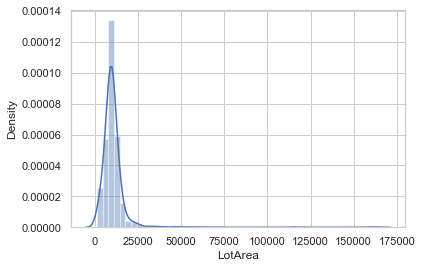

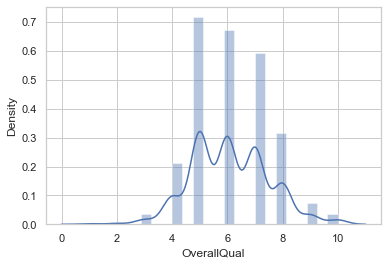

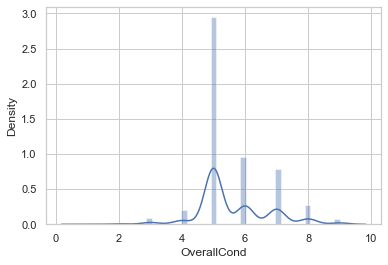

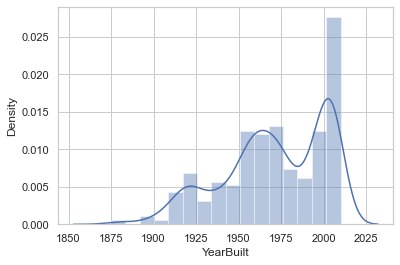

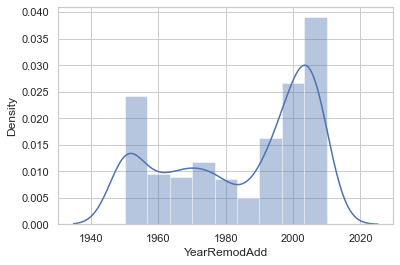

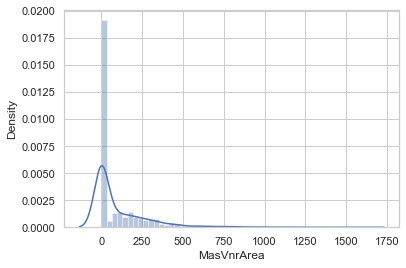

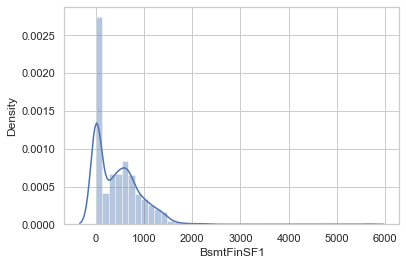

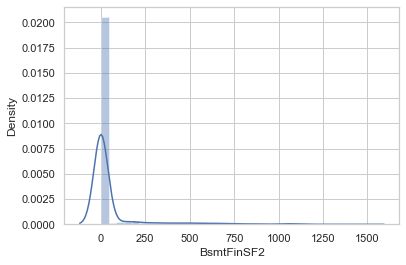

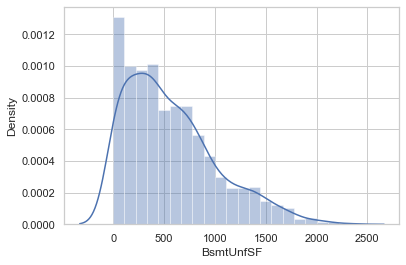

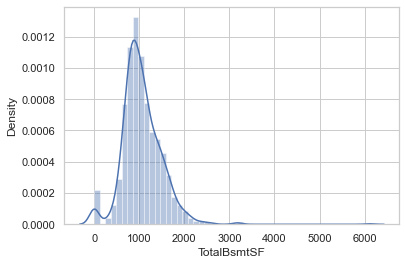

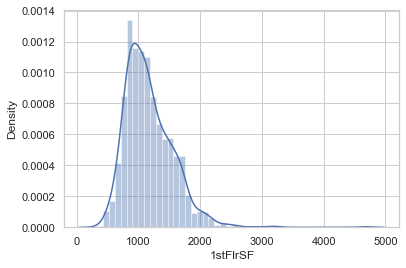

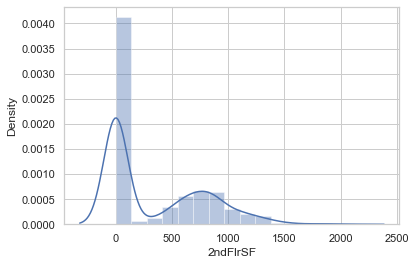

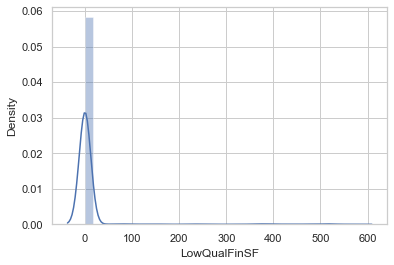

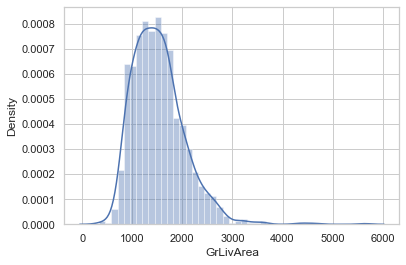

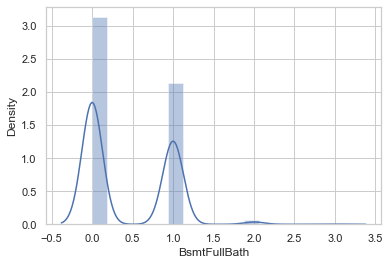

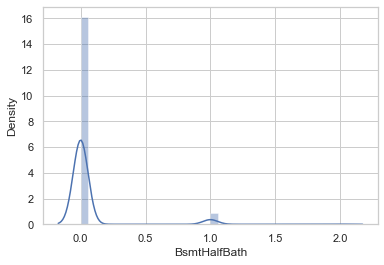

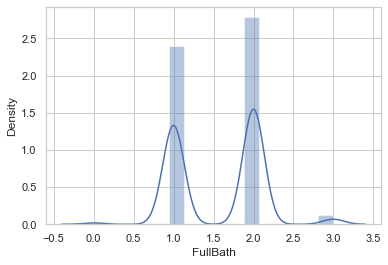

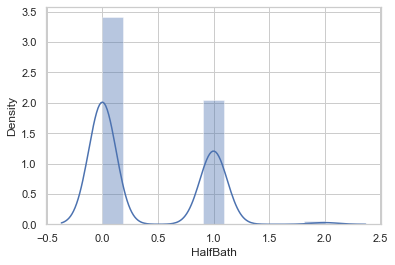

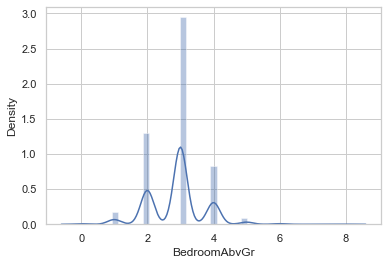

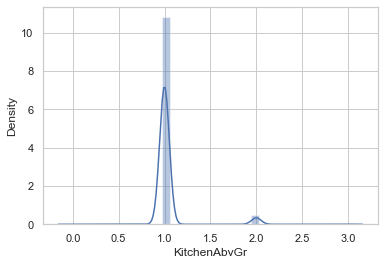

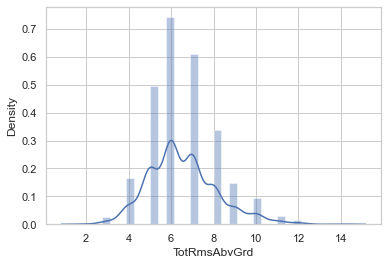

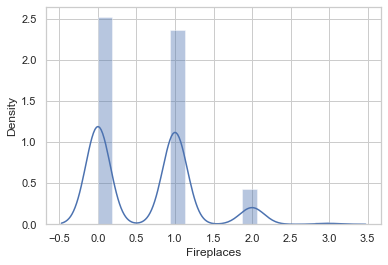

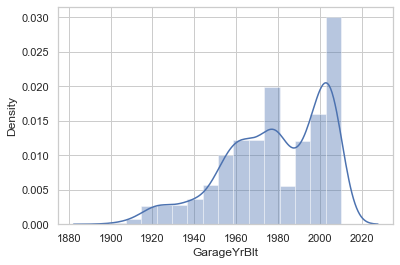

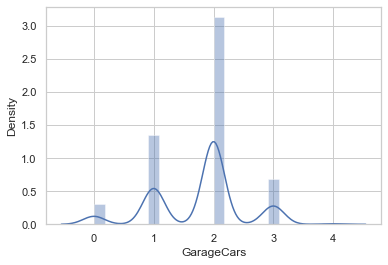

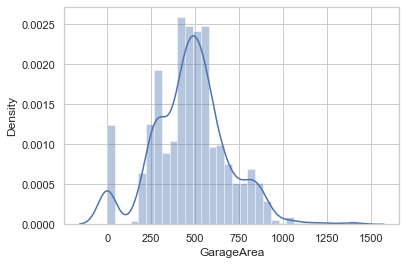

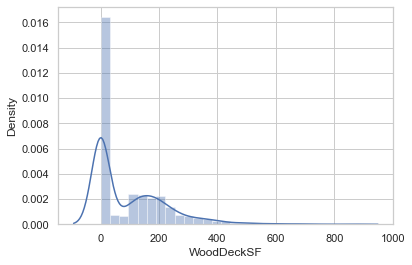

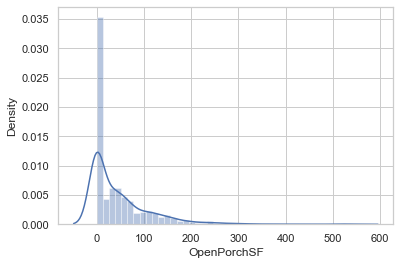

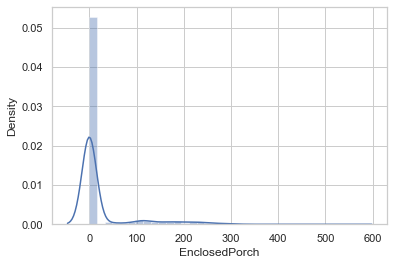

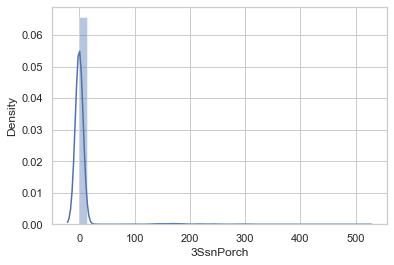

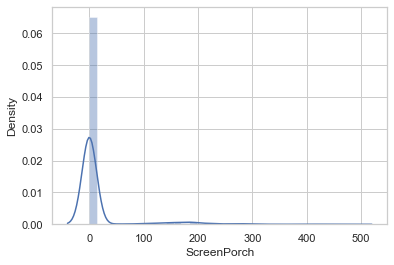

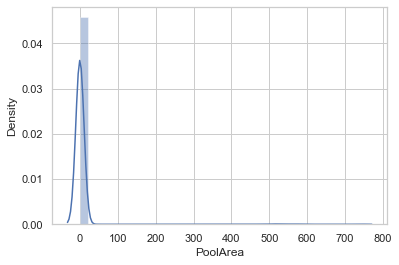

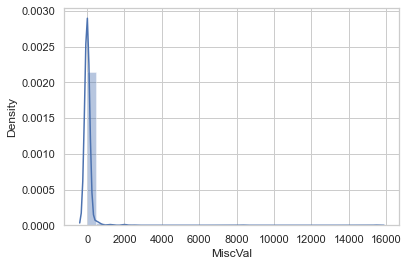

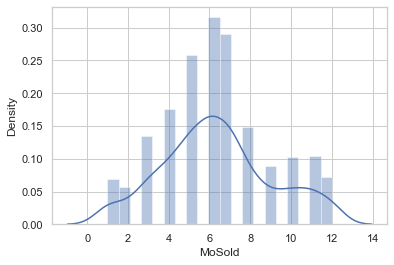

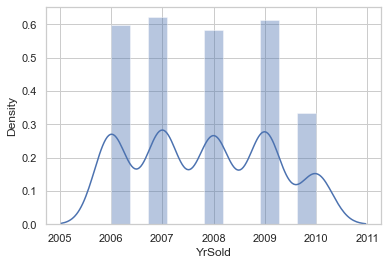

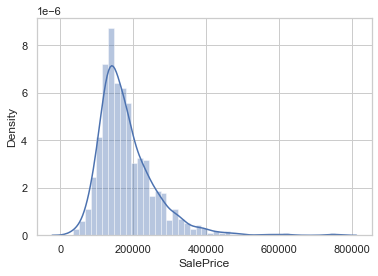

In [26]:
# Check Normality of continous data
for i in num_train.columns:
    sns.distplot(num_train[i])
    plt.show()

###### Most of the features are skewed.

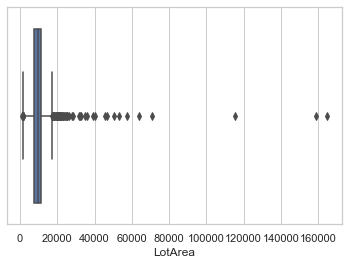

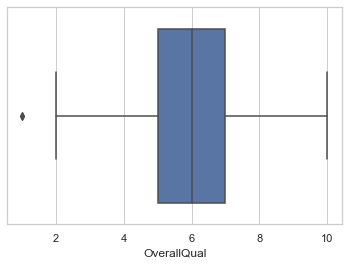

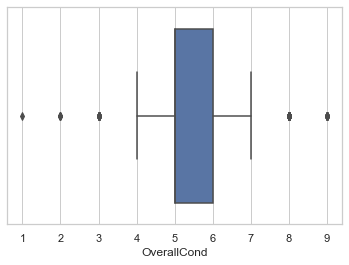

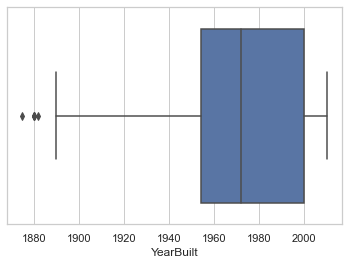

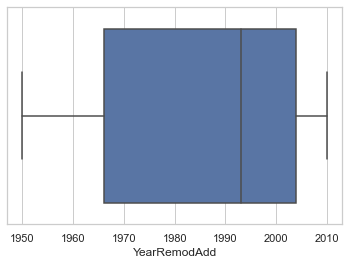

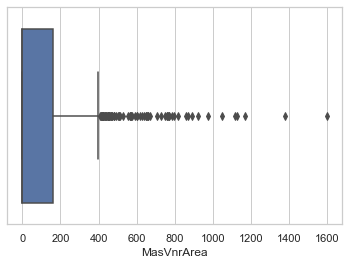

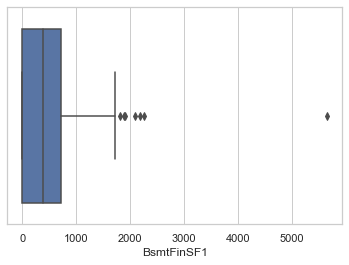

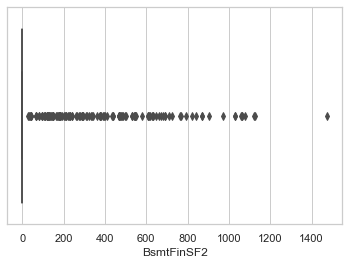

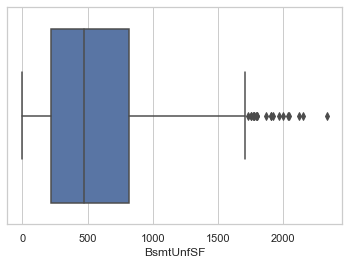

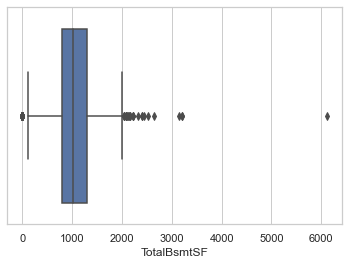

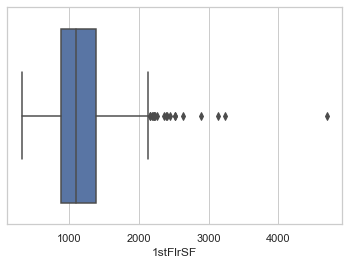

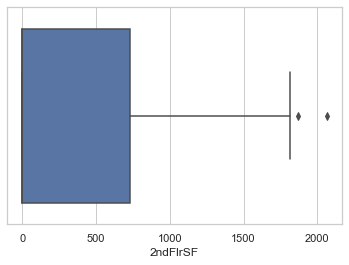

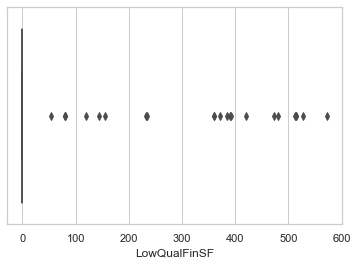

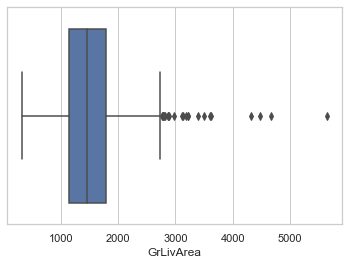

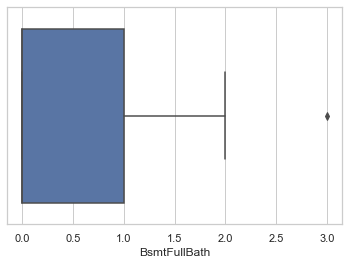

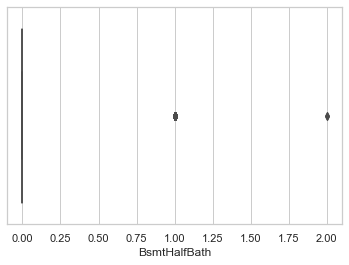

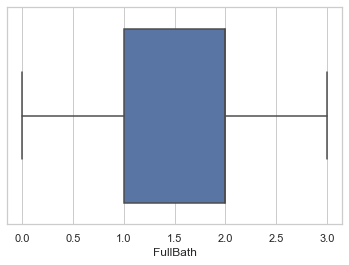

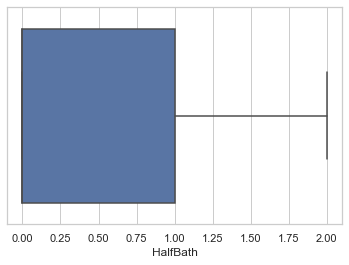

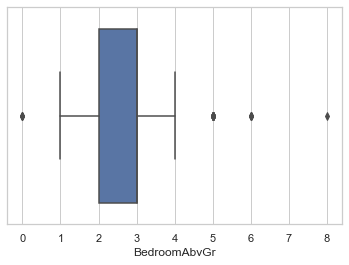

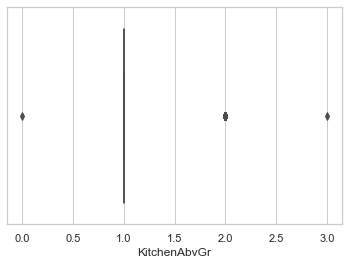

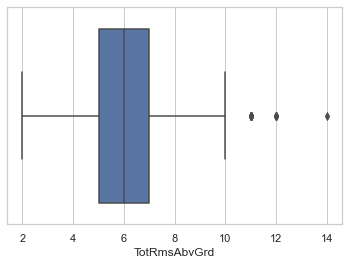

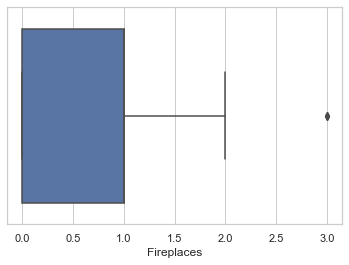

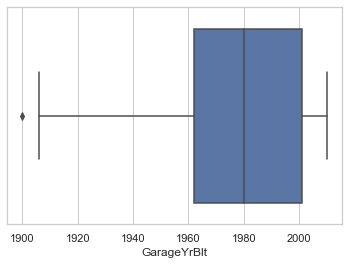

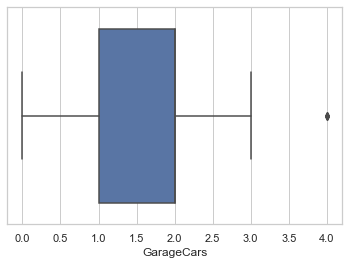

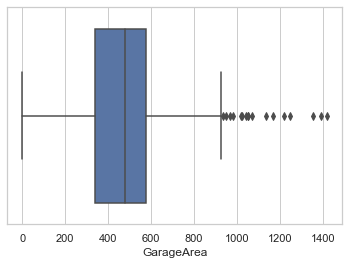

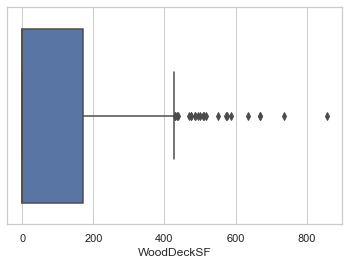

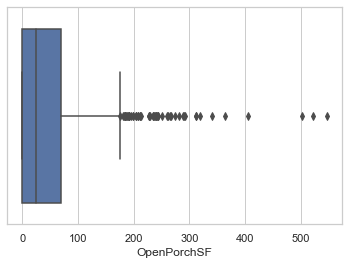

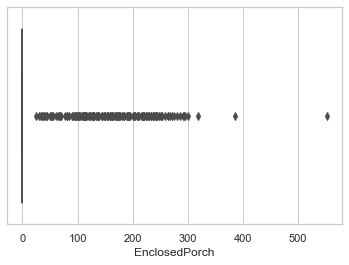

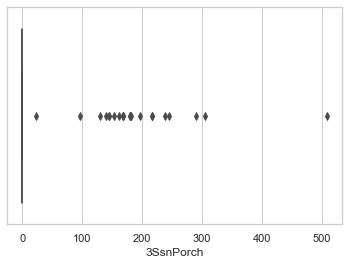

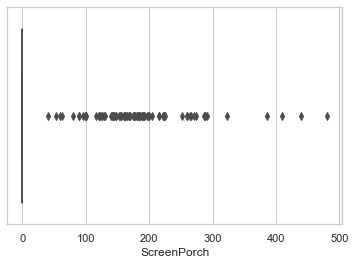

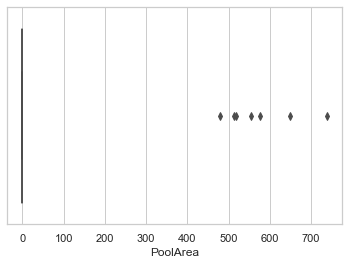

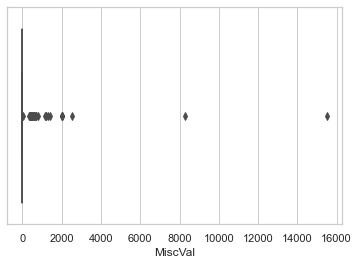

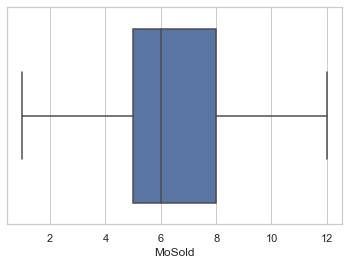

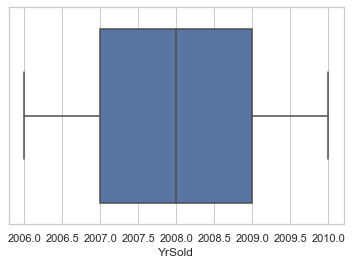

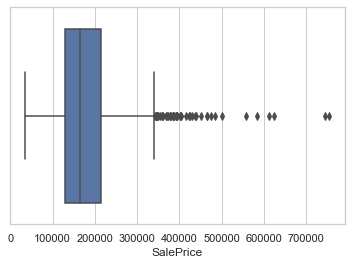

In [27]:
# Check outliers using boxplot
for col in num_train.columns:
    sns.boxplot(num_train[col])
    plt.show()

###### There are alot of outliers

In [28]:
# Check skewness
num_train.skew()

LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.674913
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
dtype: float64

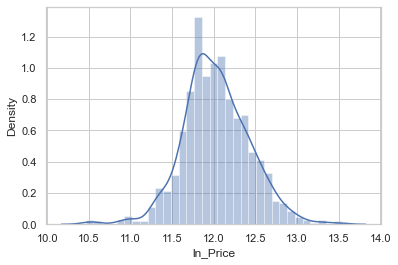

In [29]:
# log transformation for SalePrice (target)
num_train['ln_Price']=np.log(num_train.SalePrice)
# Distribution of variables
sns.distplot(num_train.ln_Price)
plt.show()

In [30]:
# Skewness of the target variable
num_train.ln_Price.skew()

0.07359740998337982

In [31]:
# Drop the Saleprice feature 
num_train.drop('SalePrice',axis=1,inplace=True)

In [32]:
# Keeping +/-0.6 as the range for skewness

In [33]:
# Use power transformer {yeo-johnson method} technique
scaler=PowerTransformer()

In [34]:
num_train[['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GrLivArea', 'LotArea', 'LowQualFinSF',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF'
           ,'YearRemodAdd']]=scaler.fit_transform(num_train[['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GrLivArea', 'LotArea', 'LowQualFinSF',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea','ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YearRemodAdd']].values)
num_train.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0 -1.213954            6            5       1976     -0.613054   -0.812901   
1  1.100521            8            6       1970     -0.854247   -0.812901   
2  0.158048            7            5       1996      0.495717   -0.812901   
3  0.496002            6            6       1977     -0.569998    1.390202   
4  1.196626            6            7       1977      0.694762    1.155573   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  WoodDeckSF  \
0   -0.112649   -0.363019   0.903777     0.099335  ...   -0.959773   
1    0.394677    2.756067   1.027313     2.374300  ...    0.781991   
2    0.925416   -0.363019  -0.504500     0.185571  ...    1.043999   
3    0.797133   -0.363019   1.160517     1.674462  ...   -0.959773   
4    1.176115   -0.363019  -0.226633     1.200095  ...    1.135369   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
0     1.409990      -0.411301  -0.138554    -0.297551 -0.077648 -0.193133   
1     1.414498      -0.411301  -0.138554     3.360787 -0.077648 -0.193133   
2     1.198911      -0.411301  -0.138554    -0.297551 -0.077648 -0.193133   
3     1.169545      -0.411301  -0.138554    -0.297551 -0.077648 -0.193133   
4    -1.061392      -0.411301  -0.138554    -0.297551 -0.077648 -0.193133   

   MoSold  YrSold   ln_Price  
0       2    2007  11.759786  
1      10    2007  12.498742  
2       6    2007  12.505399  
3       1    2010  12.154779  
4       6    2009  12.278393  

[5 rows x 35 columns]

In [35]:
# test 
num_test[['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GrLivArea', 'LotArea', 'LowQualFinSF',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea','ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF'
          ,'YearRemodAdd']]=scaler.fit_transform(num_test[['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GrLivArea', 'LotArea', 'LowQualFinSF',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea','ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YearRemodAdd']].values)
num_test.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0  0.842656            9            5       2005      1.153837    1.190680   
1 -0.739104            8            5       1984     -0.278412   -0.840837   
2  0.524304            8            5       2001      0.768563   -0.840837   
3  0.548484            7            7       1941     -1.524080   -0.840837   
4  0.897263            6            5       2007      1.235800    0.964275   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageArea  \
0    1.205140   -0.344636   0.455087     1.931242  ...         676   
1    1.064798   -0.344636  -0.841820     0.451268  ...         565   
2   -1.375716   -0.344636   2.127575     1.587714  ...         522   
3    0.235689   -0.344636  -0.093395    -0.761116  ...         234   
4   -1.375716   -0.344636   0.870427    -0.297412  ...         668   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0    1.119038     0.718308      -0.392619  -0.083045    -0.278372       0.0   
1    0.813787    -1.111540      -0.392619  -0.083045    -0.278372       0.0   
2    1.153748     1.278346      -0.392619  -0.083045    -0.278372       0.0   
3   -0.913570    -1.111540      -0.392619  -0.083045    -0.278372       0.0   
4    0.954066     0.218396      -0.392619  -0.083045    -0.278372       0.0   

    MiscVal  MoSold  YrSold  
0 -0.188311       7    2007  
1 -0.188311       8    2009  
2 -0.188311       6    2009  
3 -0.188311       7    2009  
4 -0.188311       1    2008  

[5 rows x 34 columns]

In [36]:
num_train.skew()

LotArea           0.032509
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.225131
MasVnrArea        0.439526
BsmtFinSF1       -0.404528
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
1stFlrSF         -0.002391
2ndFlrSF          0.280208
LowQualFinSF      6.922843
GrLivArea        -0.000054
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.674913
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        0.113026
OpenPorchSF      -0.002749
EnclosedPorch     2.022616
3SsnPorch         7.087955
ScreenPorch       3.067153
PoolArea         12.817372
MiscVal           4.991071
MoSold            0.220979
YrSold            0.115765
ln_Price          0.073597
dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

## EDA

### Univariate analysis

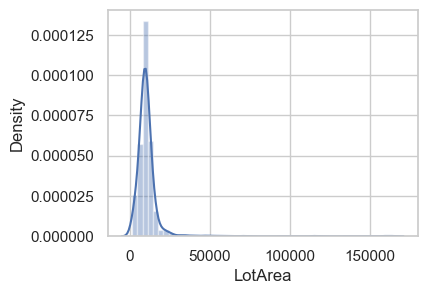

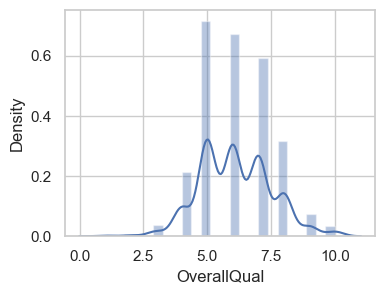

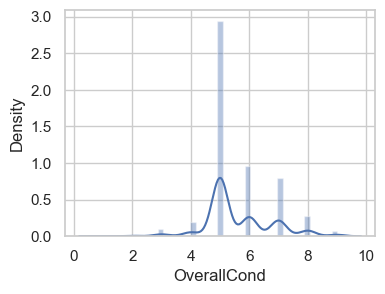

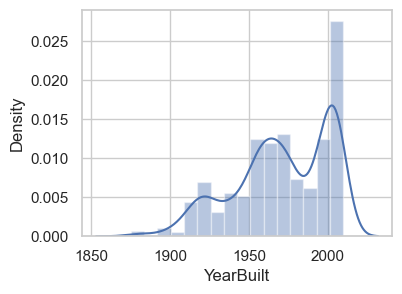

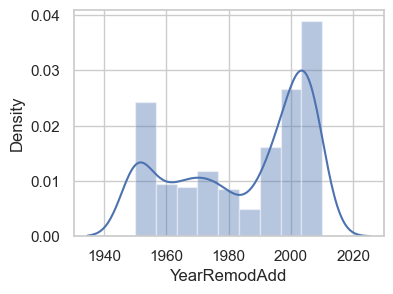

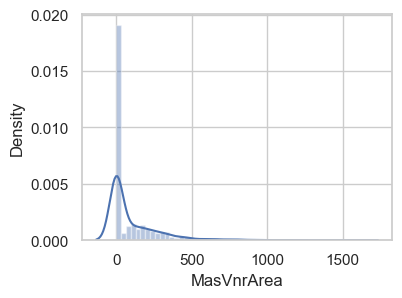

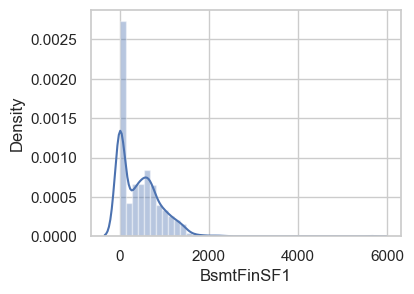

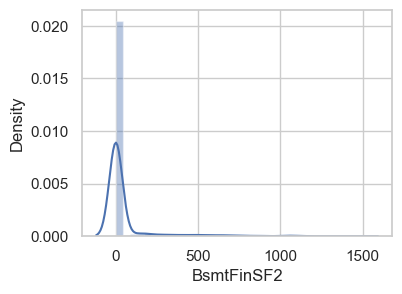

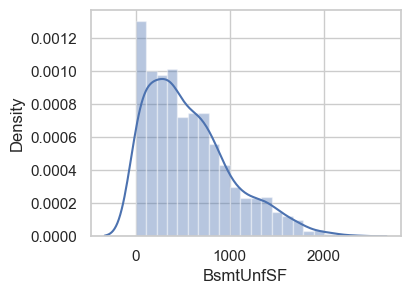

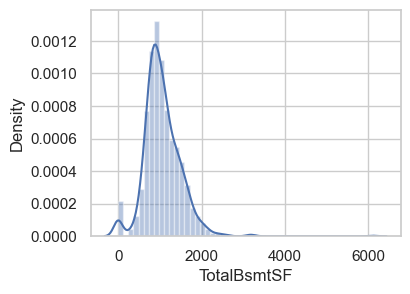

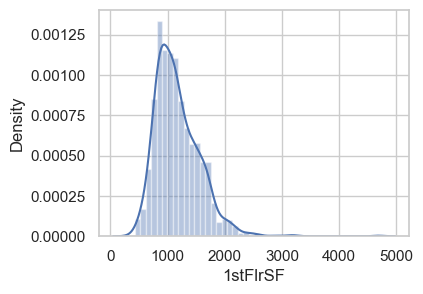

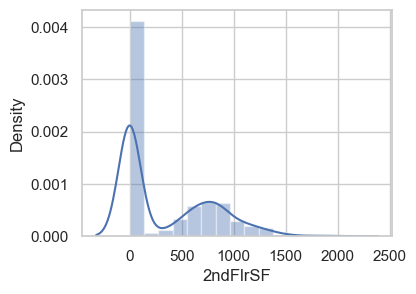

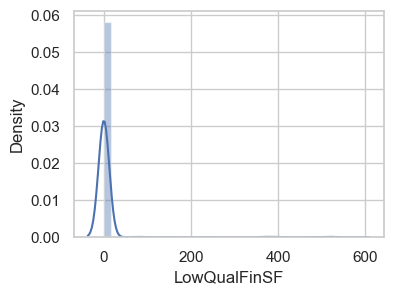

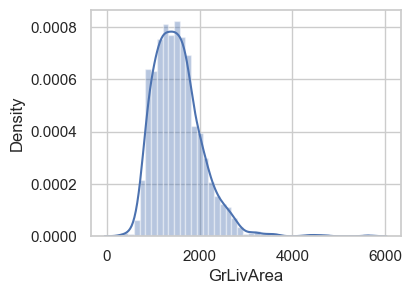

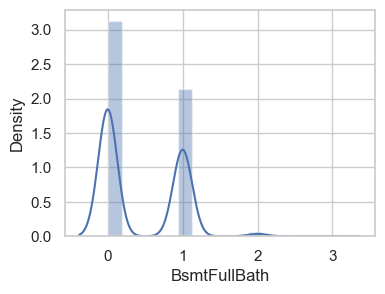

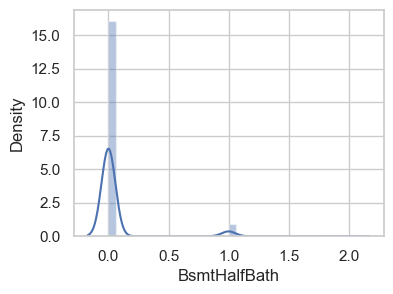

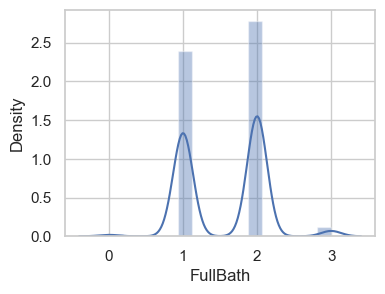

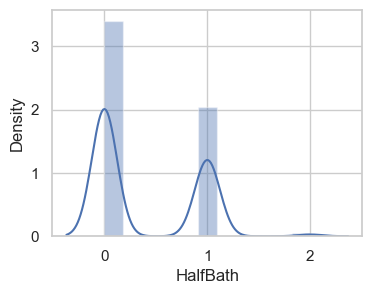

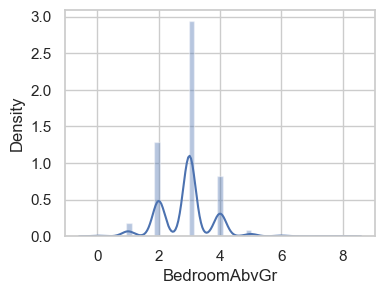

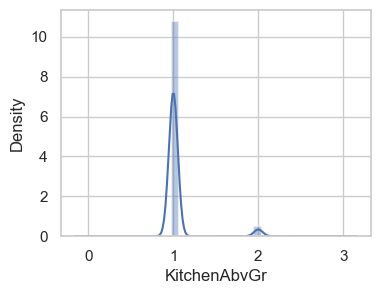

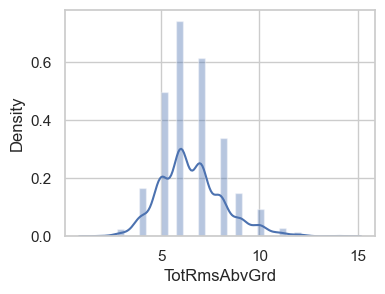

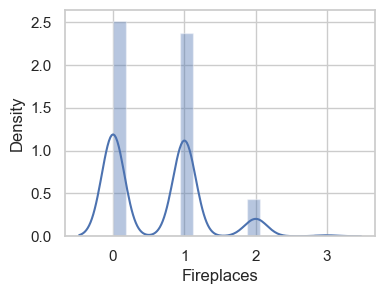

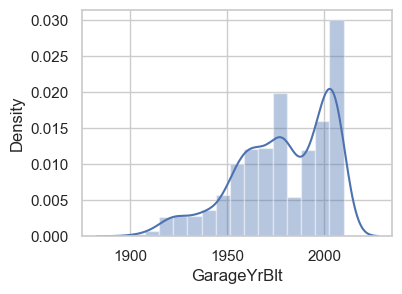

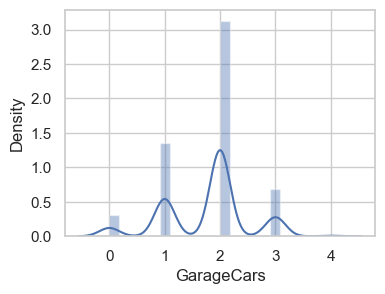

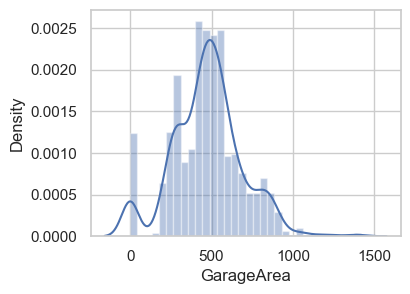

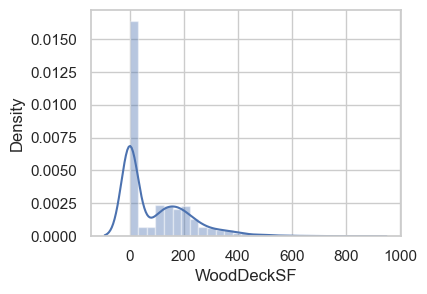

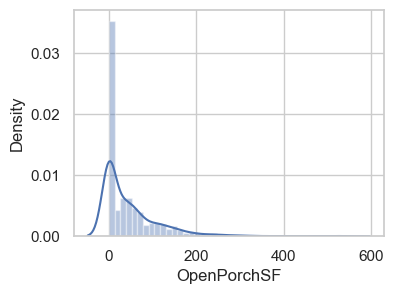

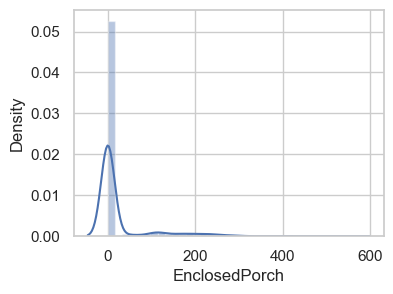

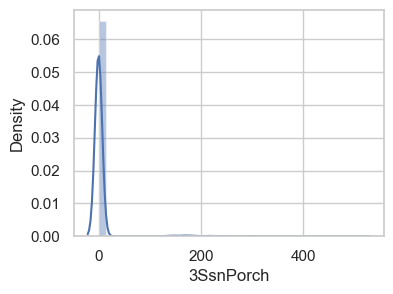

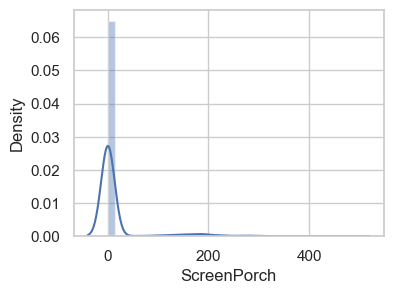

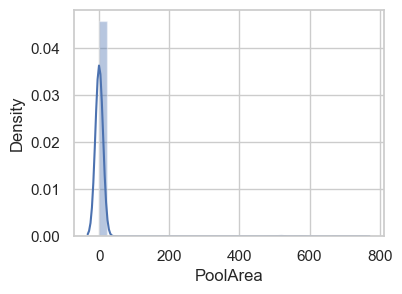

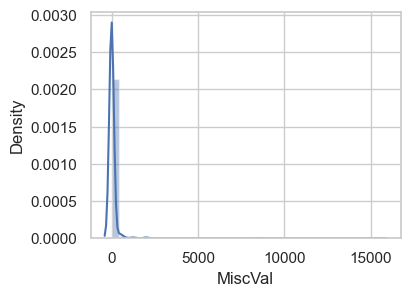

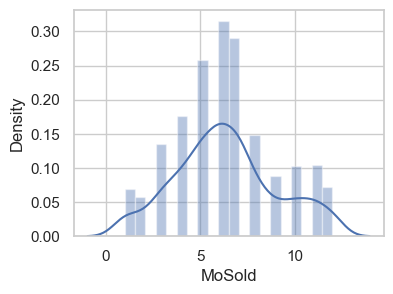

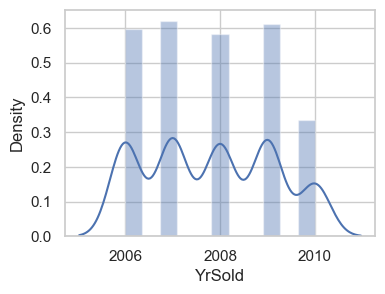

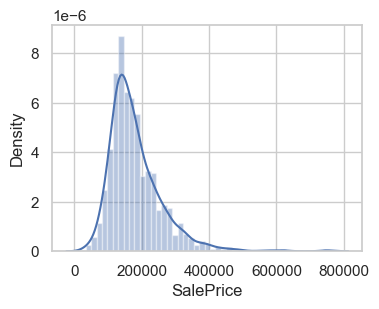

In [37]:
for col in num_train_eda.columns:
    plt.figure(figsize=(4,3),dpi=100)
    sns.distplot(num_train_eda[col])
    plt.show()

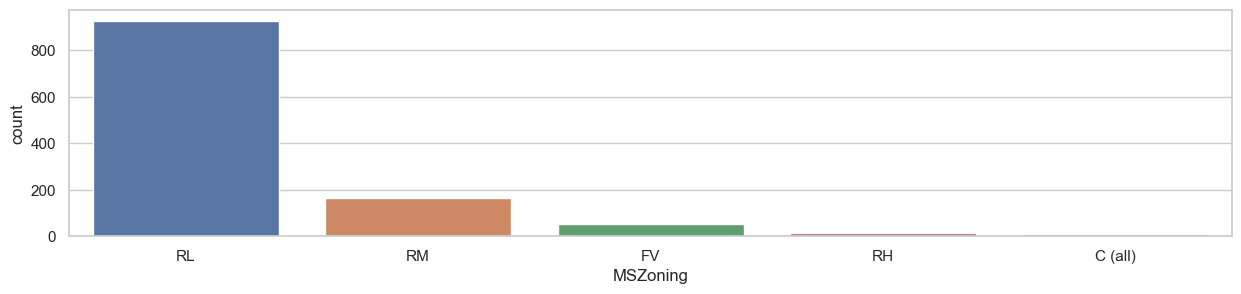

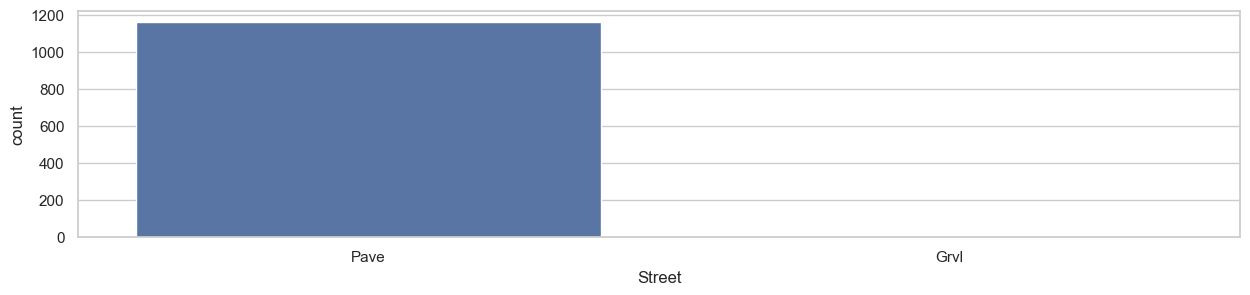

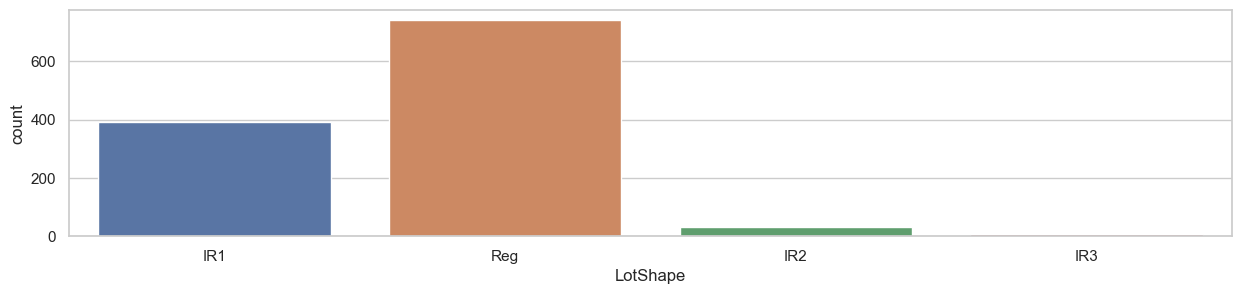

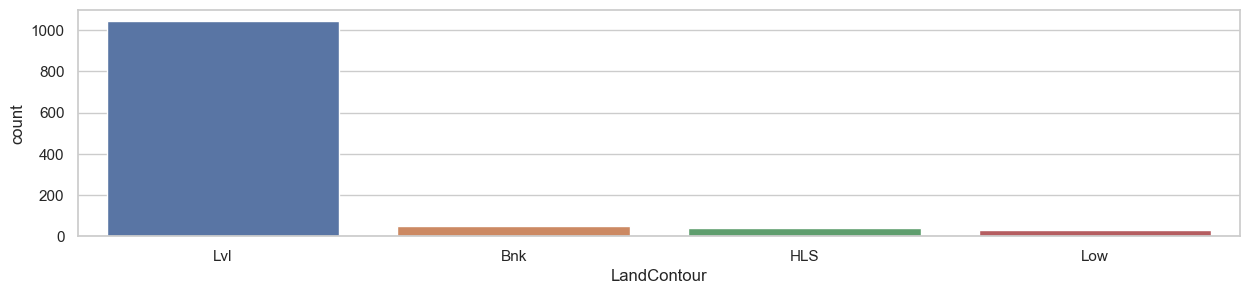

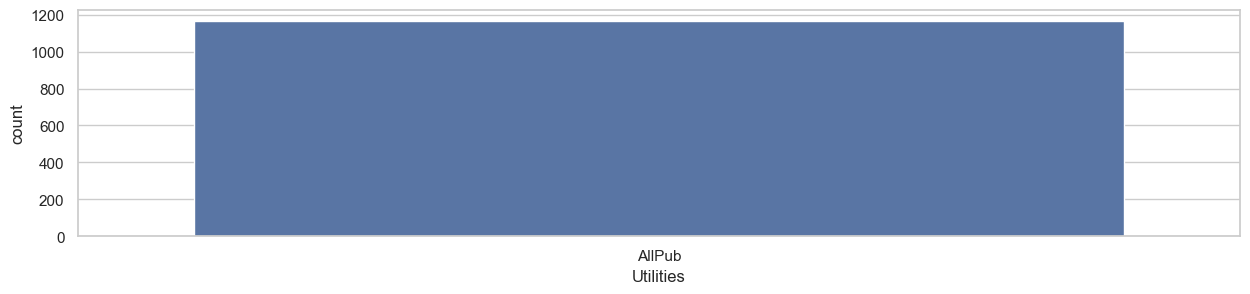

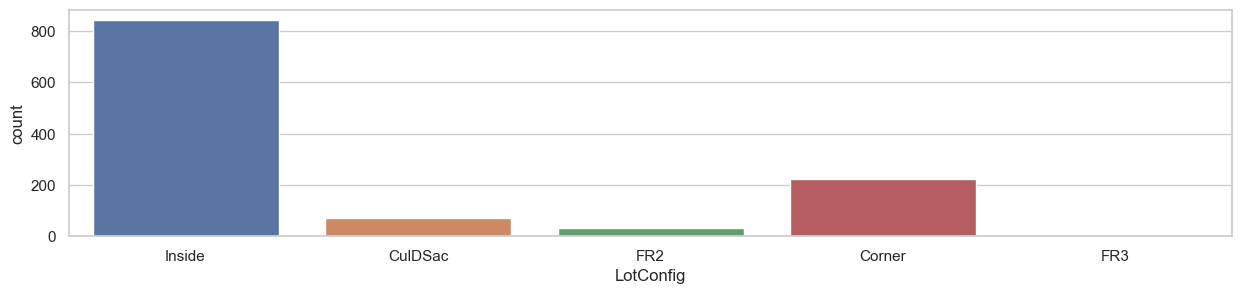

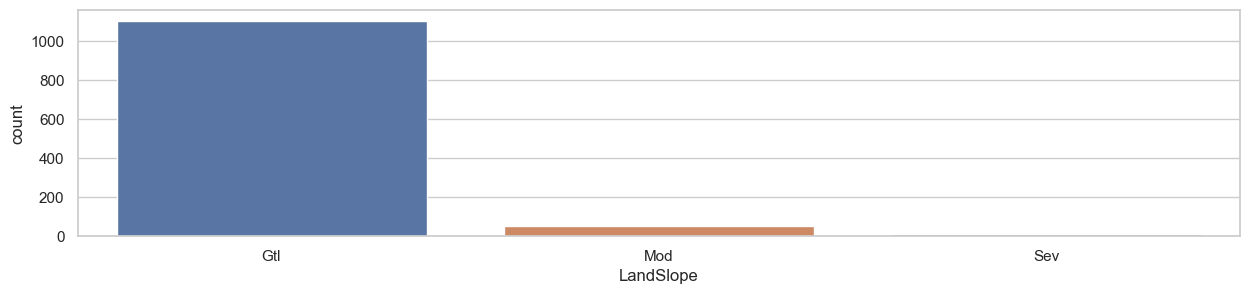

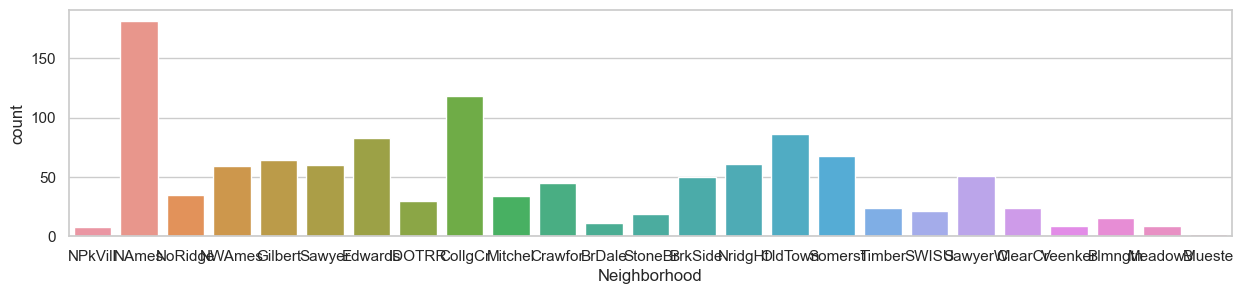

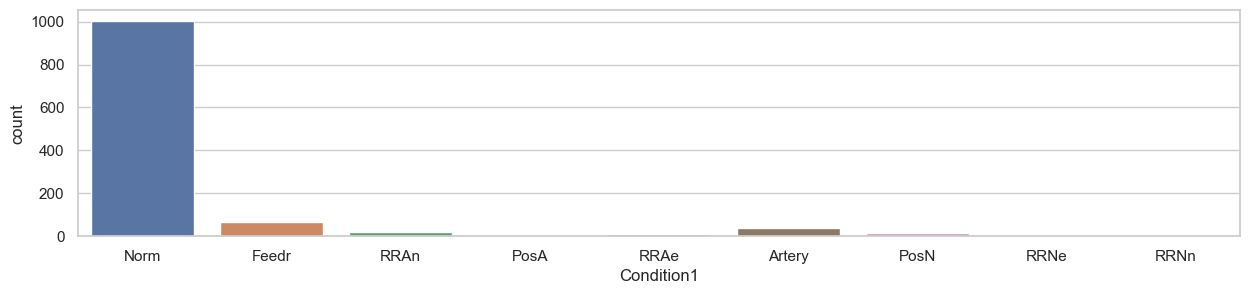

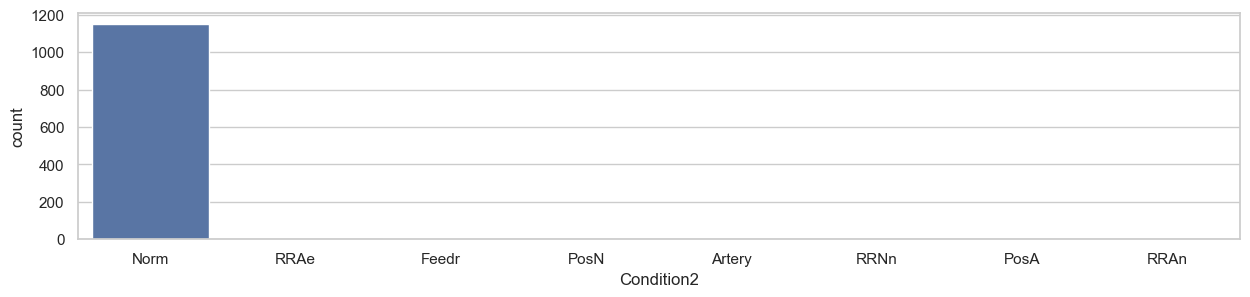

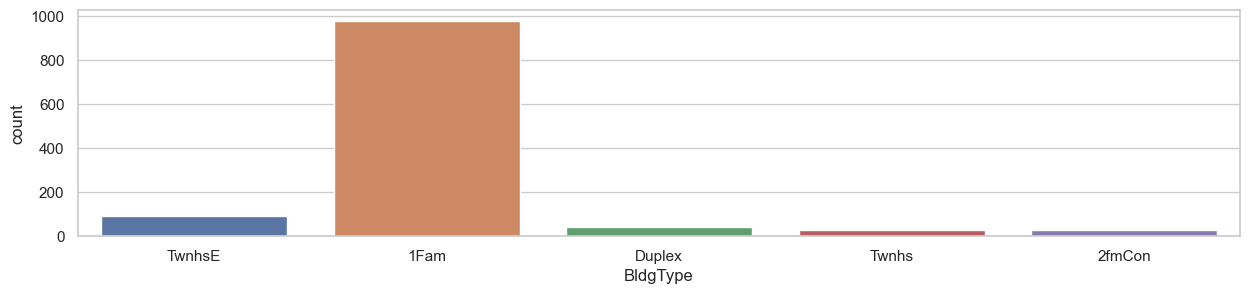

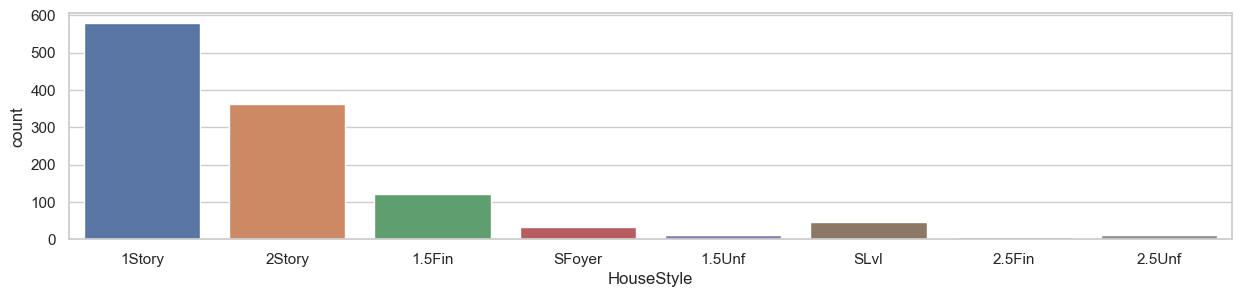

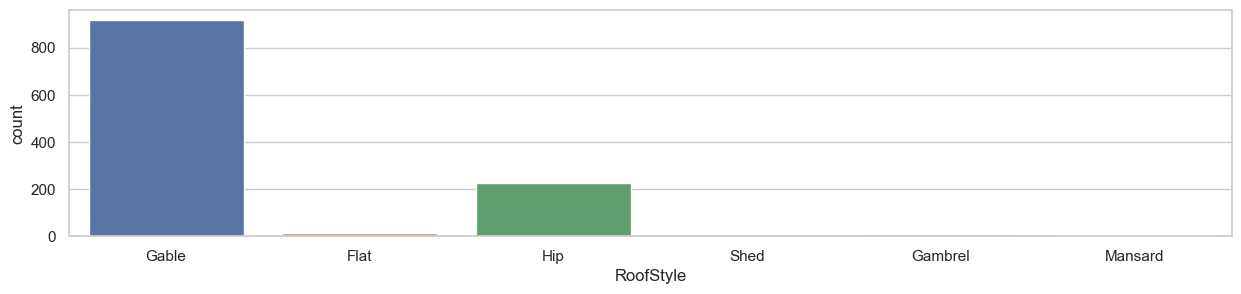

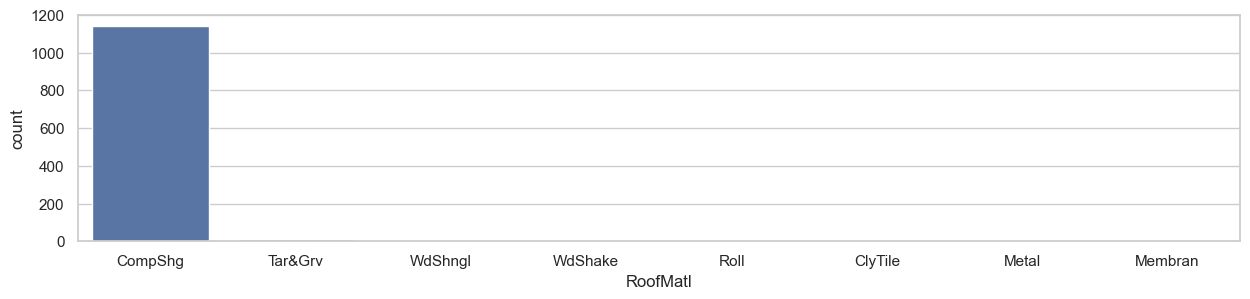

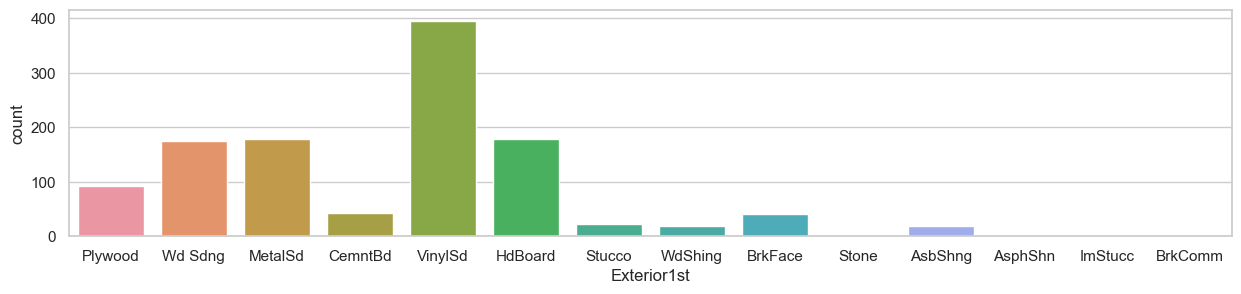

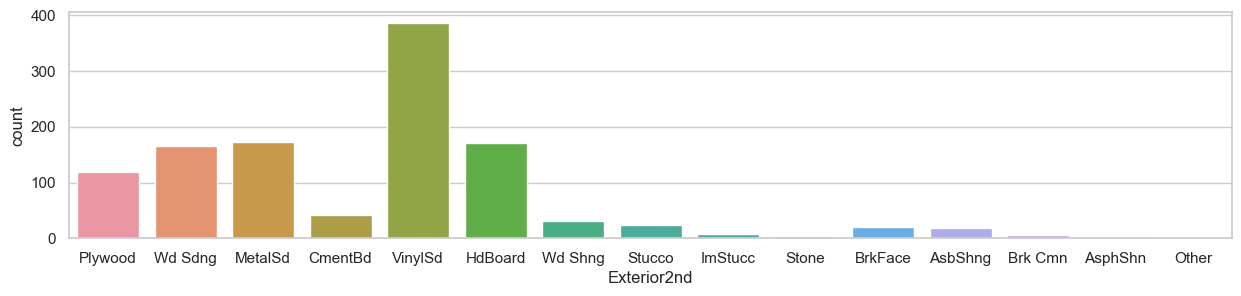

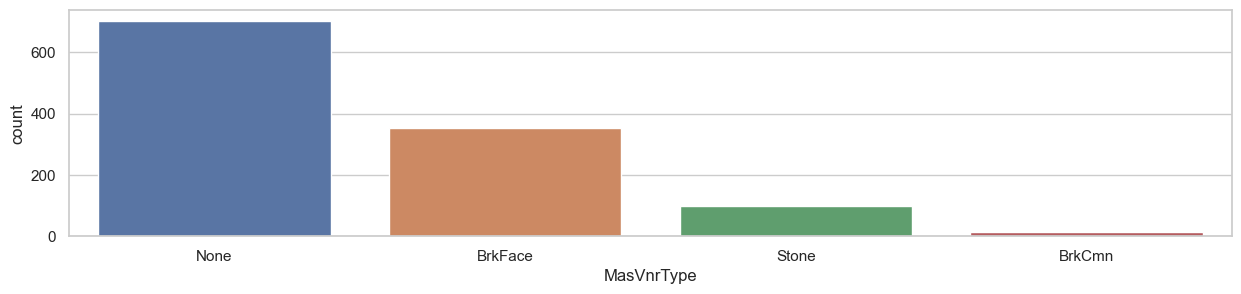

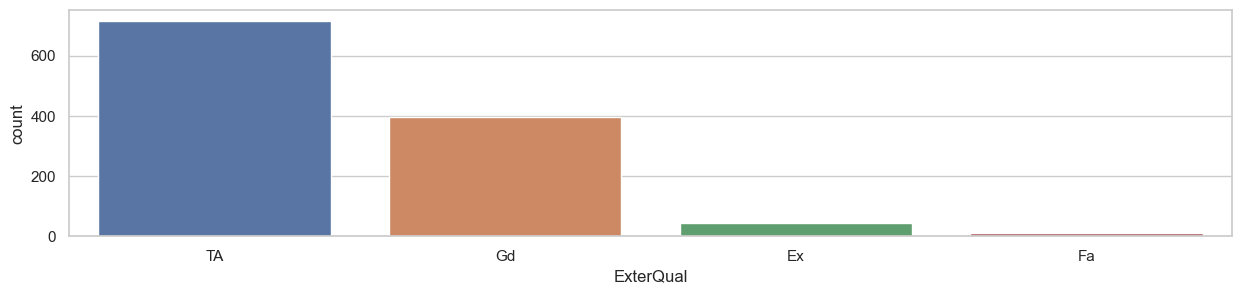

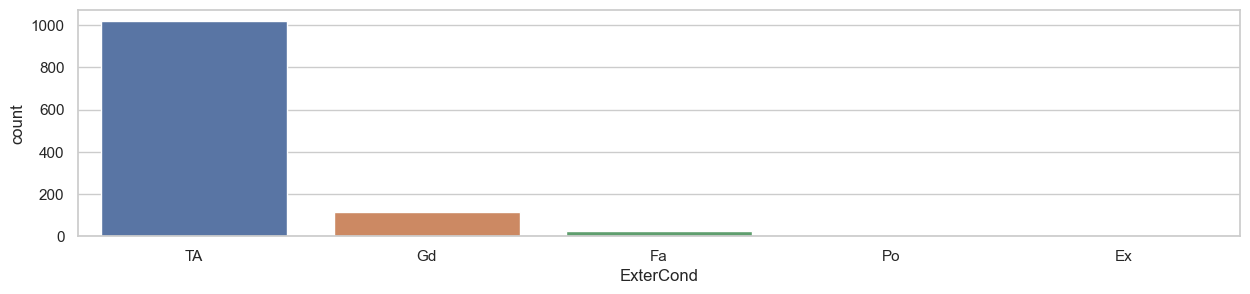

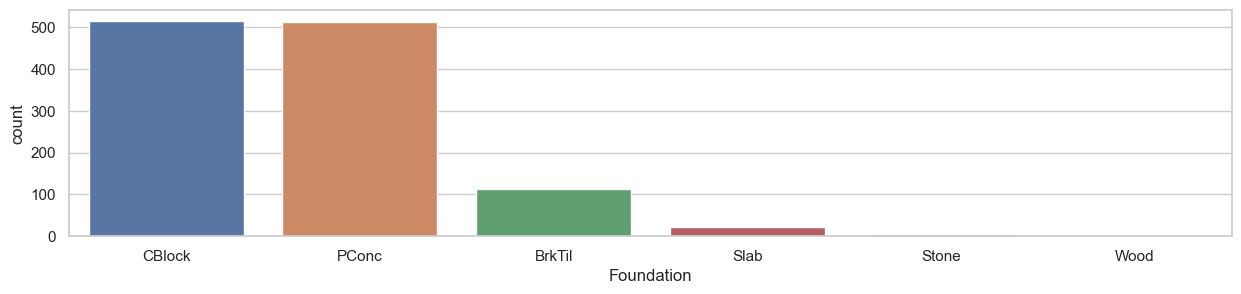

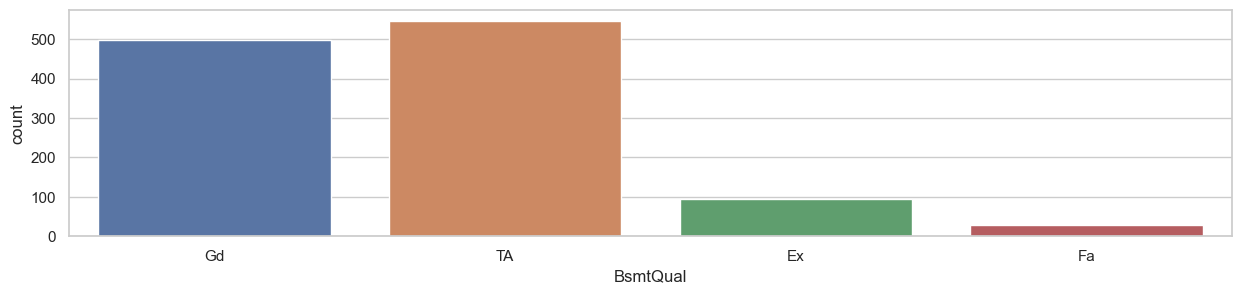

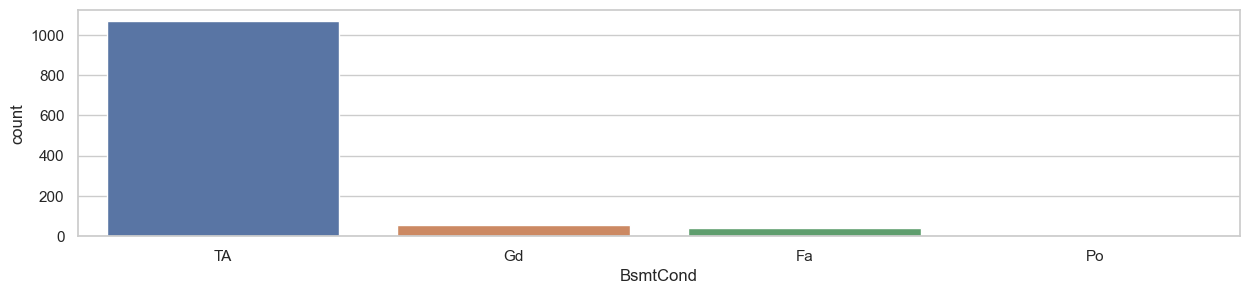

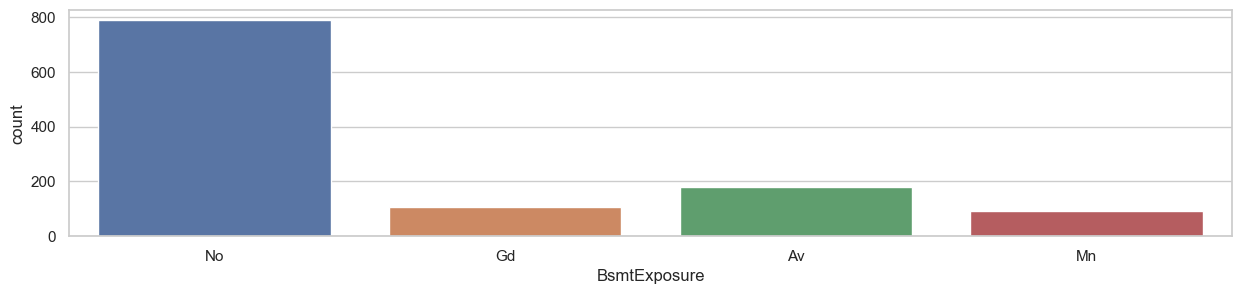

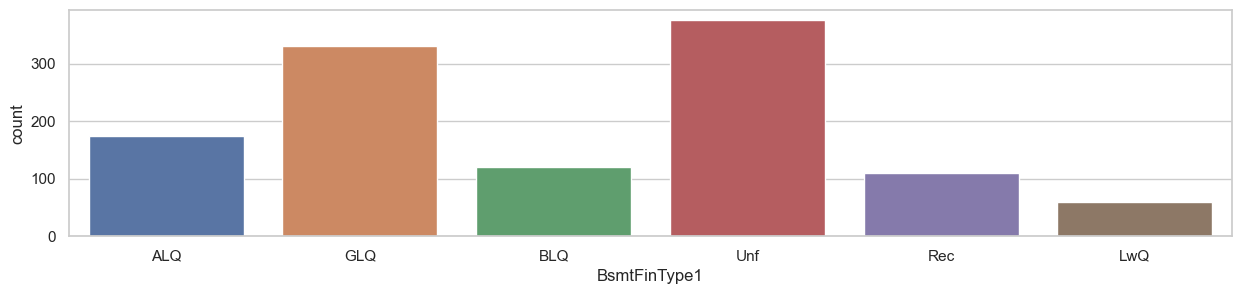

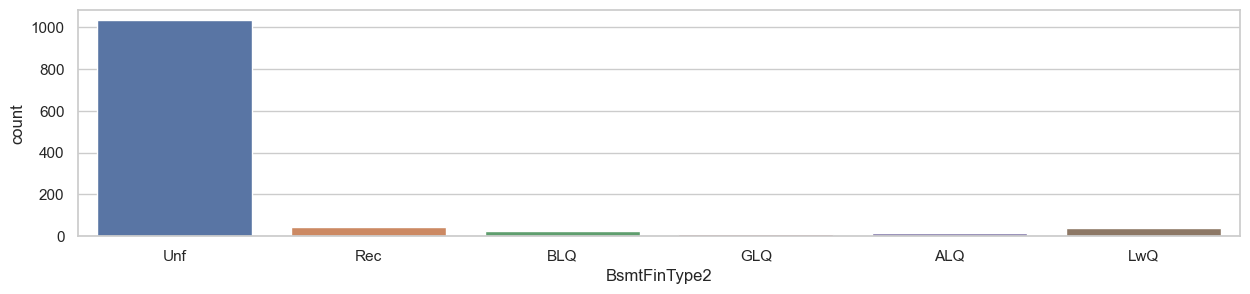

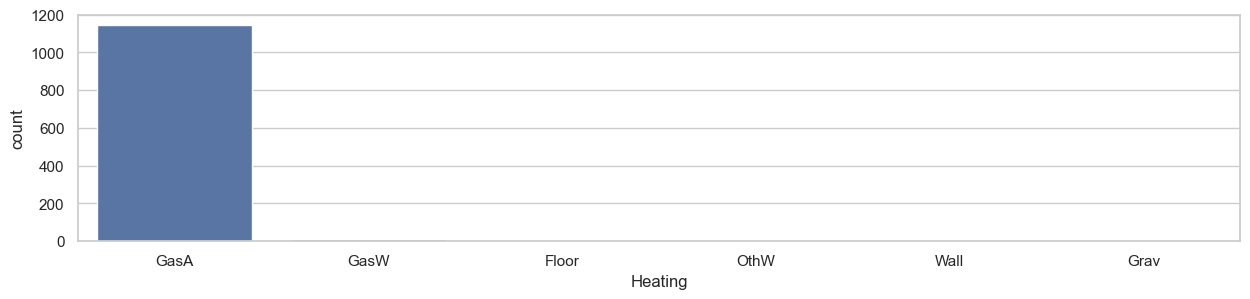

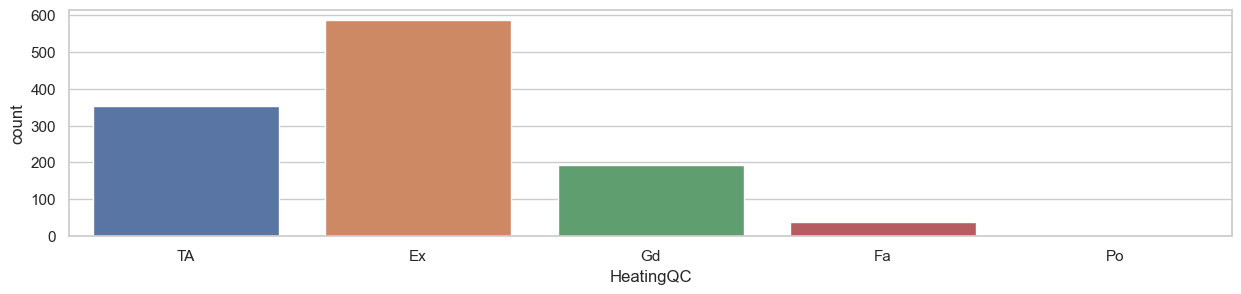

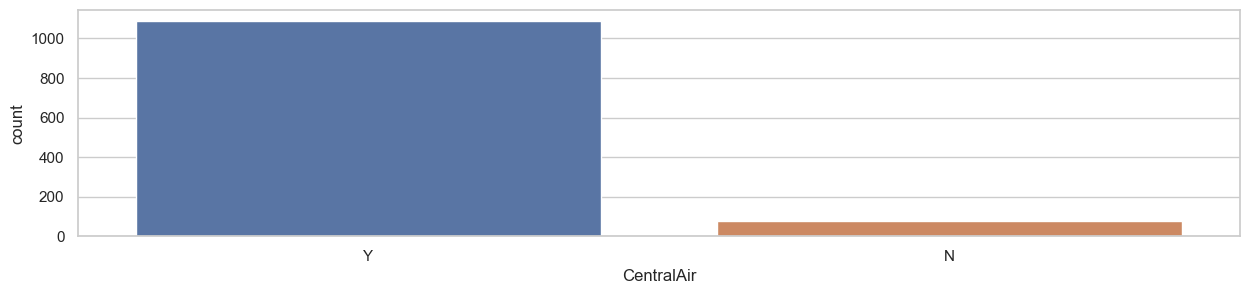

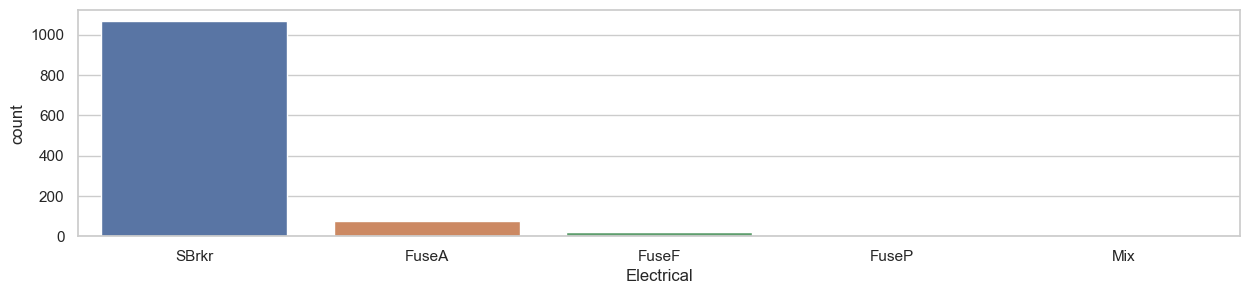

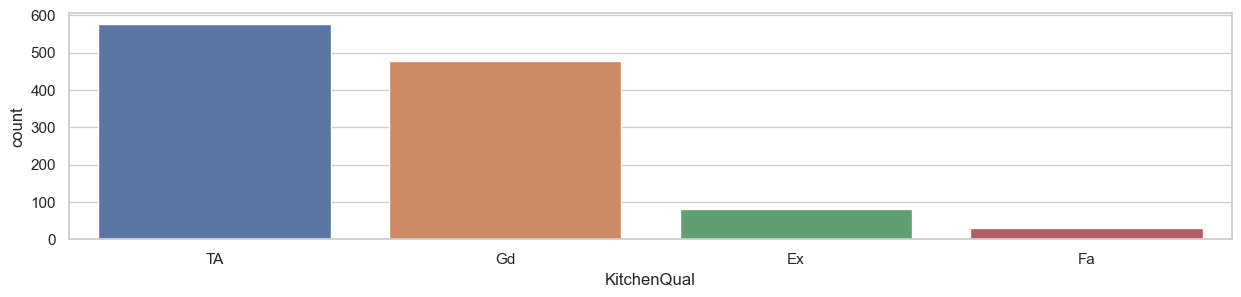

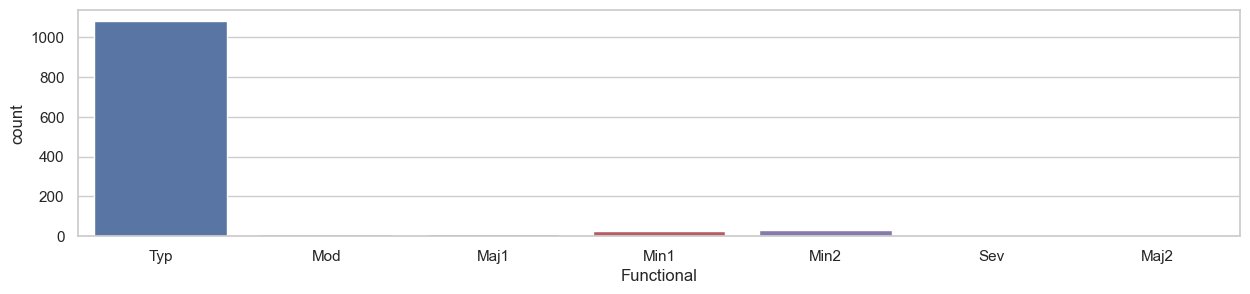

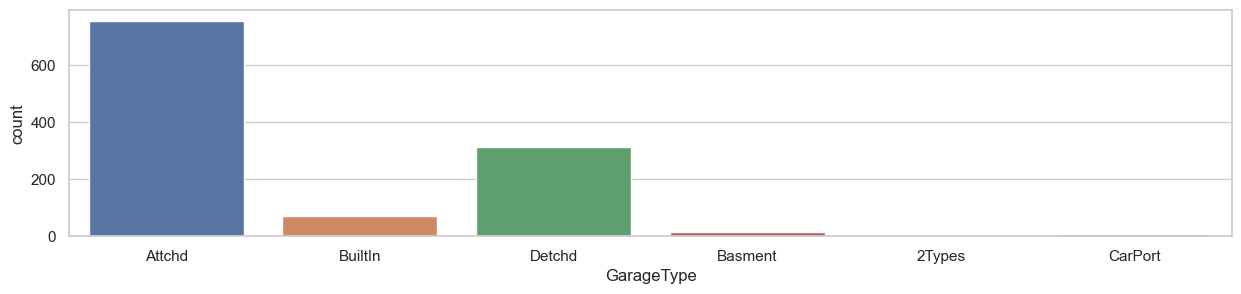

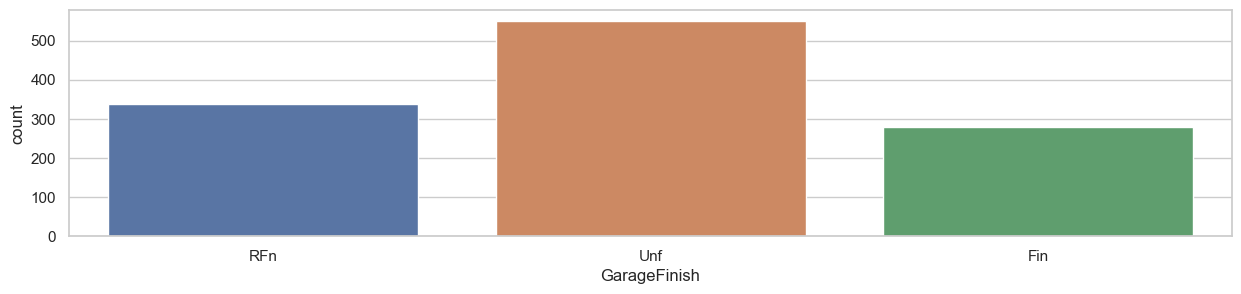

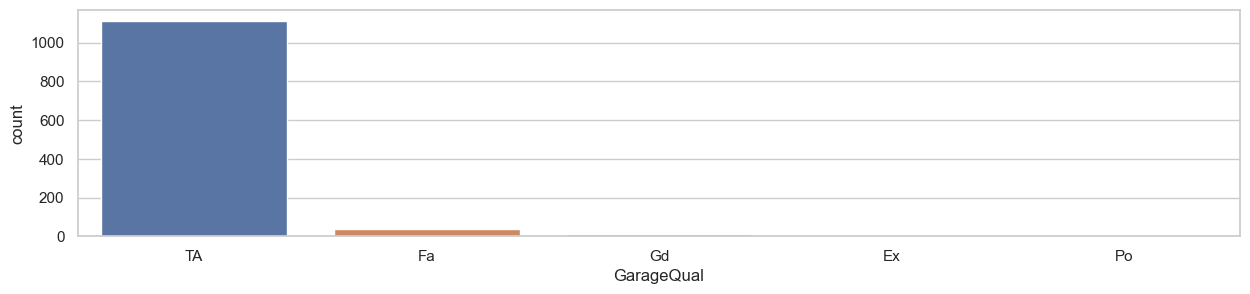

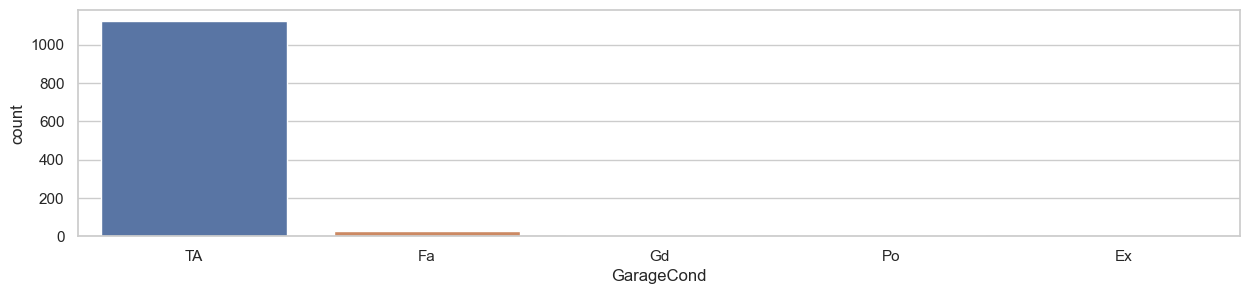

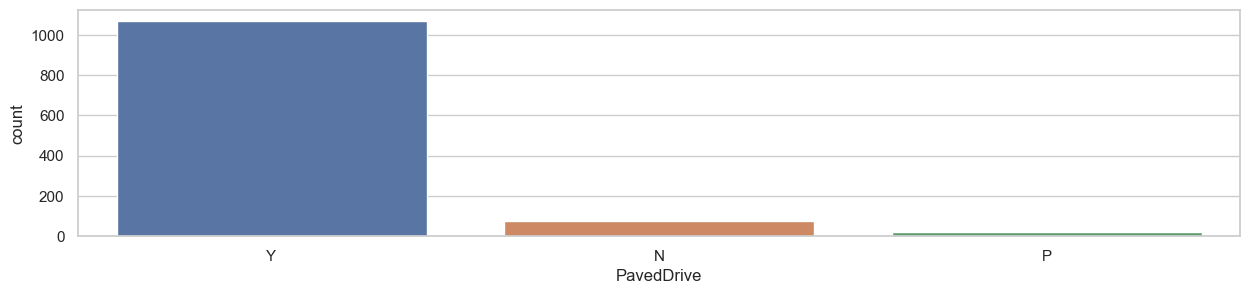

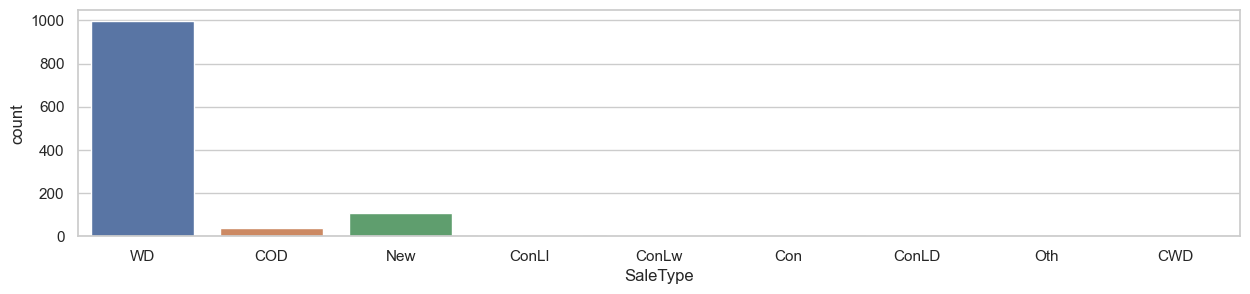

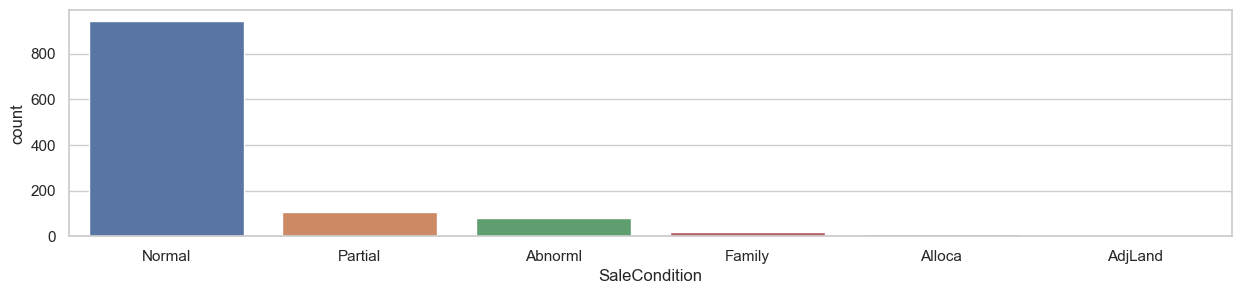

In [38]:
for col in cat_train.columns:
    plt.figure(figsize=(15,3),dpi=100)
    sns.countplot(cat_train[col])
    plt.show()

In [39]:
## Insights from the above graphs

# Average Lot area is around 10000 ft2
# There are old houses built in 1878 and ne whouses built in 2009
# Most of the houses are Residentail low density & Pave street.
# Landcontoour is flat, lotshape is regular.
# All Public Utilities are availabe.
# lotconfig are inside, land slope are Gentle, Most Neighborhood is North Ames.
# Normal is the only dominant in the condition 2.
# Most of the dwelling are Single-family Detached.
# Most of the houses are 1story(50%) or 2story (30%).
# All houses are Standard (Composite) Shingle roof material.
# Roof style are either Gable or Hip.
# all the exterioir of the houses are Vinyl Siding.
# Most sale conditions are normal.
# all Houses have Gas heating.
# Most houses have Standard Circuit Breakers,Romex and air conditions
# Most of the sale type are arranty Deed - Conventional (85%).
# Most of the garage houses are in normal condition.
# 50% of the Interior finish of the garage is unfinished.
# More than 70% of the garages are Garage location. 

-------------------------------------------------------------------------------------------------------------------------------

### Bvariate analysis

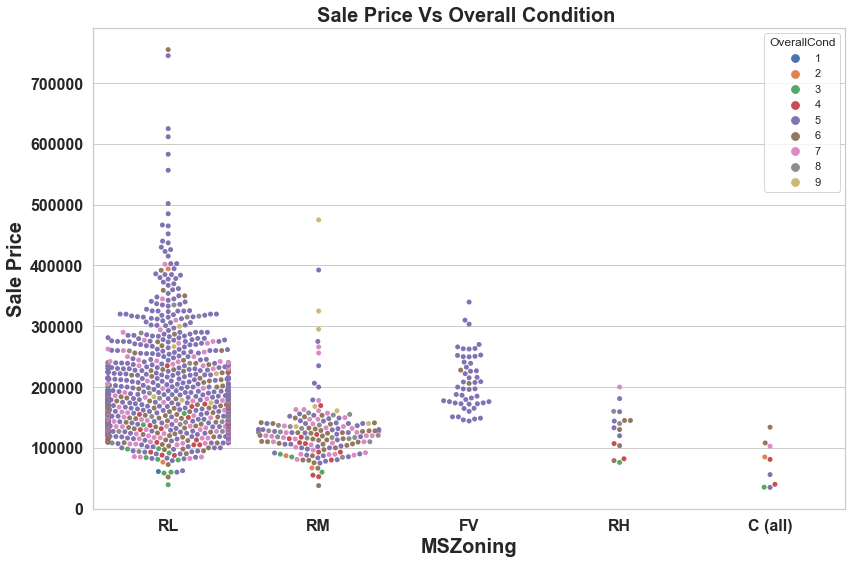

In [40]:
# Exploring MSZoning Type and sale price with overallcond

plt.rcParams['figure.autolayout']= True
plt.figure(figsize=(12,8))
sns.swarmplot(y=num_train_eda['SalePrice'], x=cat_train['MSZoning'], hue =num_train_eda['OverallCond'])
plt.title("Sale Price Vs Overall Condition ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 20,fontweight ='bold')
plt.ylabel('Sale Price',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:


Most of property for sale have overall condition rating of either 5 or 6.

We already know of 80% of housing data belongs to Low density Residential Area and Now we can see in Swramplot that Sale Price inside RL Zone is much higher than other remaining zone.

Cheapest properties are available in Commerical zone.

Another interesting observation we get here is for some house properties having Overall condition Rating of 8 & 9 have low price compare to others. This indicate that Overall Condition Rating is Not significant factor in determination of Sale price. Overall Condition Rating may helpful to buyer in taking decision of Buying property but not in determination of House Price.

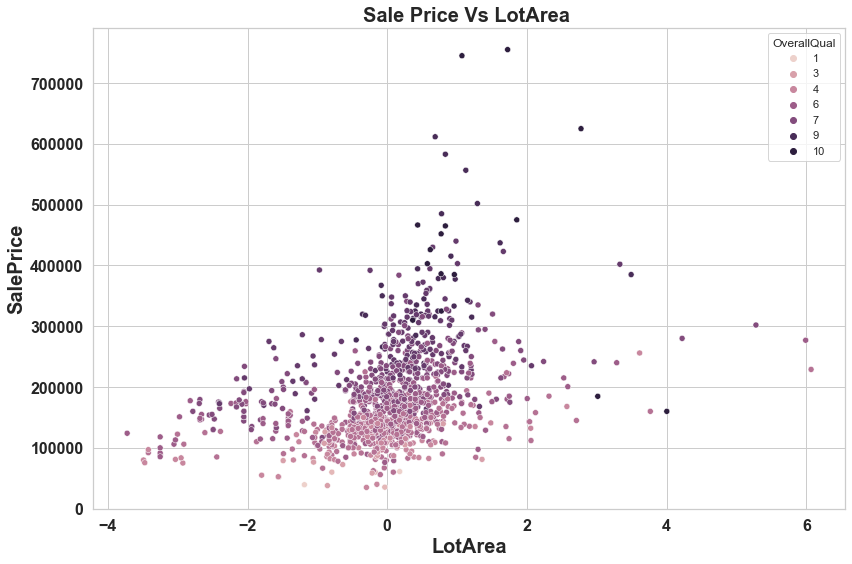

In [41]:
# Quality and Area for sale price
plt.rcParams['figure.autolayout']= True
plt.figure(figsize=(12,8))
sns.scatterplot(y=num_train_eda['SalePrice'], x=num_train['LotArea'], hue =num_train_eda['OverallQual'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
There is No Significant relationship found between Sale price & Lot area.

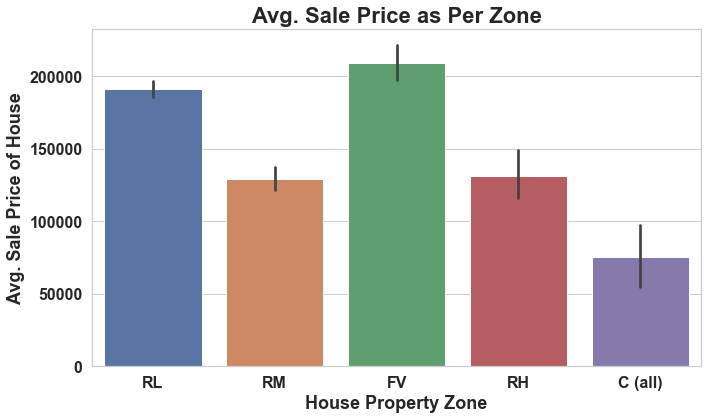

In [42]:
plt.rcParams['figure.autolayout'] = True
plt.figure(figsize = (10,6))
sns.barplot(y = num_train_eda['SalePrice'], x= cat_train['MSZoning'])
plt.title('Avg. Sale Price as Per Zone', fontsize=22, fontweight='bold')
plt.xlabel('House Property Zone', fontsize= 18, fontweight='bold')
plt.ylabel('Avg. Sale Price of House', fontsize=18, fontweight= 'bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

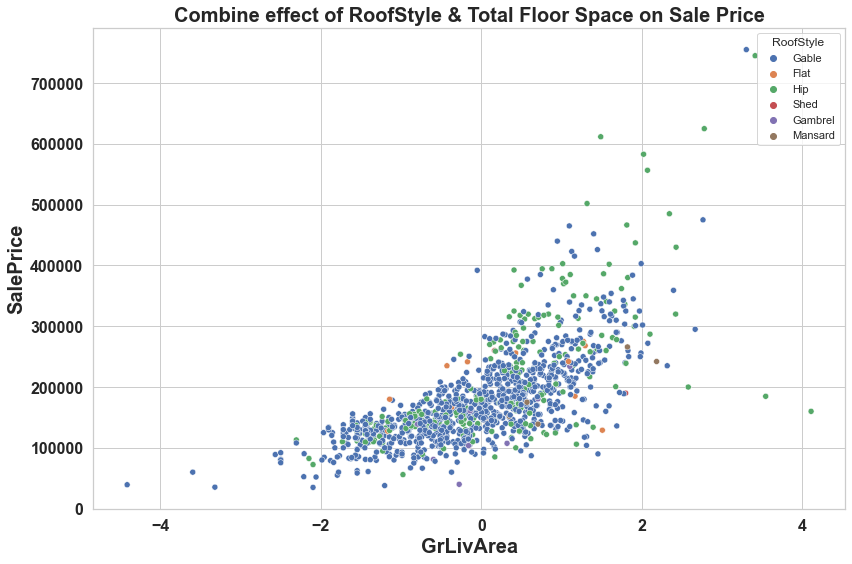

In [43]:
# Combine effect of RoofStyle & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
plt.figure(figsize=(12,8))
sns.scatterplot(y=num_train_eda['SalePrice'], x=num_train['GrLivArea'], hue =cat_train['RoofStyle'])
plt.title("Combine effect of RoofStyle & Total Floor Space on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation :-
For High floor area construction mainly Hip style Roof is used and invariably high cost properties mostly comes up with Hip Style Roof.*



-------------------------------------------------------------------------------------------------------------------------------

In [44]:
# Drop these features as it does not contain 1% of unique values
cat_train.drop(columns=['Condition1','Condition2','Utilities','LandSlope','RoofMatl','Functional','Heating'],inplace=True)
cat_test.drop(columns=['Condition1','Condition2','Utilities','LandSlope','RoofMatl','Functional','Heating'],inplace=True)

In [45]:
# Drop these features as there are the total area feature
num_train.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],inplace=True)
num_test.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],inplace=True)

In [46]:
# Drop these features 
num_train.drop(columns=['1stFlrSF','2ndFlrSF','LowQualFinSF'],inplace=True)
num_test.drop(columns=['1stFlrSF','2ndFlrSF','LowQualFinSF'],inplace=True)

#### Feature Extraction

In [47]:
# Converting years column to age column
num_train['Year_SinceBuilt'] = num_train['YearBuilt'].max() - num_train['YearBuilt']
num_train['Year_SinceRemodAdded'] = num_train['YearRemodAdd'].max() - num_train['YearRemodAdd']
num_train['Year_Since'] = num_train['YrSold'].max() - num_train['YrSold']
num_train['GarageAge'] = num_train['GarageYrBlt'].max() - num_train['GarageYrBlt']

In [48]:
# Converting years column to age column
num_test['Year_SinceBuilt'] = num_test['YearBuilt'].max() - num_test['YearBuilt']
num_test['Year_SinceRemodAdded'] = num_test['YearRemodAdd'].max() - num_test['YearRemodAdd']
num_test['Year_Since'] = num_test['YrSold'].max() - num_test['YrSold']
num_test['GarageAge'] = num_test['GarageYrBlt'].max() - num_test['GarageYrBlt']

In [49]:
# Dropping old columns in train dataset
num_train.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1,inplace = True)

In [50]:
# Dropping old columns in train dataset
num_test.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [51]:
cat_train

MSZoning Street LotShape LandContour LotConfig Neighborhood BldgType  \
0          RL   Pave      IR1         Lvl    Inside      NPkVill   TwnhsE   
1          RL   Pave      IR1         Lvl    Inside        NAmes     1Fam   
2          RL   Pave      IR1         Lvl   CulDSac      NoRidge     1Fam   
3          RL   Pave      IR1         Lvl    Inside       NWAmes     1Fam   
4          RL   Pave      IR1         Lvl       FR2       NWAmes     1Fam   
...       ...    ...      ...         ...       ...          ...      ...   
1163       RL   Pave      IR1         Lvl    Inside       Sawyer     1Fam   
1164       RL   Pave      Reg         Lvl    Inside      Edwards     1Fam   
1165       RL   Pave      Reg         Lvl       FR2      NPkVill    Twnhs   
1166  C (all)   Pave      Reg         Lvl    Inside       IDOTRR     1Fam   
1167       RL   Pave      IR1         Lvl    Inside      Gilbert     1Fam   

     HouseStyle RoofStyle Exterior1st  ... CentralAir Electrical KitchenQual  \
0        1Story     Gable     Plywood  ...          Y      SBrkr          TA   
1        1Story      Flat     Wd Sdng  ...          Y      SBrkr          Gd   
2        2Story     Gable     MetalSd  ...          Y      SBrkr          TA   
3        1Story       Hip     Plywood  ...          Y      SBrkr          TA   
4        1Story     Gable     CemntBd  ...          Y      SBrkr          Gd   
...         ...       ...         ...  ...        ...        ...         ...   
1163     1Story     Gable     MetalSd  ...          Y      SBrkr          TA   
1164     1Story     Gable     VinylSd  ...          Y      SBrkr          Gd   
1165     2Story     Gable     Plywood  ...          Y      SBrkr          TA   
1166     2Story   Gambrel     BrkFace  ...          N      SBrkr          TA   
1167     2Story     Gable     VinylSd  ...          Y      SBrkr          Gd   

     GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0        Attchd          RFn         TA         TA          Y       WD   
1        Attchd          Unf         TA         TA          Y       WD   
2        Attchd          Unf         TA         TA          Y       WD   
3        Attchd          RFn         TA         TA          Y      COD   
4        Attchd          Fin         TA         TA          Y       WD   
...         ...          ...        ...        ...        ...      ...   
1163     Detchd          Unf         TA         TA          Y       WD   
1164     Detchd          Fin         TA         TA          N       WD   
1165     Attchd          Unf         TA         TA          Y       WD   
1166     Detchd          Unf         TA         Fa          N       WD   
1167     Attchd          Fin         TA         TA          Y       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3           Normal  
4           Normal  
...            ...  
1163        Normal  
1164        Normal  
1165        Normal  
1166        Normal  
1167        Normal  

[1168 rows x 31 columns]

-------------------------------------------------------------------------------------------------------------------------------

In [52]:
# Handling Categorical features for train data 

# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_train.columns:
    cat_train[i] = le.fit_transform(cat_train[i])
cat_train.head()

MSZoning  Street  LotShape  LandContour  LotConfig  Neighborhood  BldgType  \
0         3       1         0            3          4            13         4   
1         3       1         0            3          4            12         0   
2         3       1         0            3          1            15         0   
3         3       1         0            3          4            14         0   
4         3       1         0            3          2            14         0   

   HouseStyle  RoofStyle  Exterior1st  ...  CentralAir  Electrical  \
0           2          1            8  ...           1           4   
1           2          0           12  ...           1           4   
2           5          1            7  ...           1           4   
3           2          3            8  ...           1           4   
4           2          1            4  ...           1           4   

   KitchenQual  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0            3           1             1           4           4           2   
1            2           1             2           4           4           2   
2            3           1             2           4           4           2   
3            3           1             1           4           4           2   
4            2           1             0           4           4           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         0              4  
4         8              4  

[5 rows x 31 columns]

In [53]:
# Handling Categorical features for test data 

# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_test.columns:
    cat_test[i] = le.fit_transform(cat_test[i])
cat_test.head()

MSZoning  Street  LotShape  LandContour  LotConfig  Neighborhood  BldgType  \
0         2       1         0            1          0            21         0   
1         2       1         0            3          1            21         4   
2         2       1         3            3          4             4         0   
3         2       1         3            0          4             5         0   
4         2       1         0            3          1            20         0   

   HouseStyle  RoofStyle  Exterior1st  ...  CentralAir  Electrical  \
0           2          3            9  ...           1           3   
1           2          1            5  ...           1           3   
2           2          3            9  ...           1           3   
3           5          1            6  ...           1           3   
4           5          1            9  ...           1           3   

   KitchenQual  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0            2           1             0           4           4           2   
1            2           1             1           4           4           2   
2            0           1             1           4           4           2   
3            1           1             2           4           4           2   
4            2           3             0           4           4           2   

   SaleType  SaleCondition  
0         5              2  
1         0              0  
2         5              2  
3         5              2  
4         5              2  

[5 rows x 31 columns]

In [54]:
# Train final data
train_final=pd.concat([num_train,cat_train], axis=1)

In [55]:
# Test final data
test_final=pd.concat([num_test,cat_test], axis=1)

##### Correlation

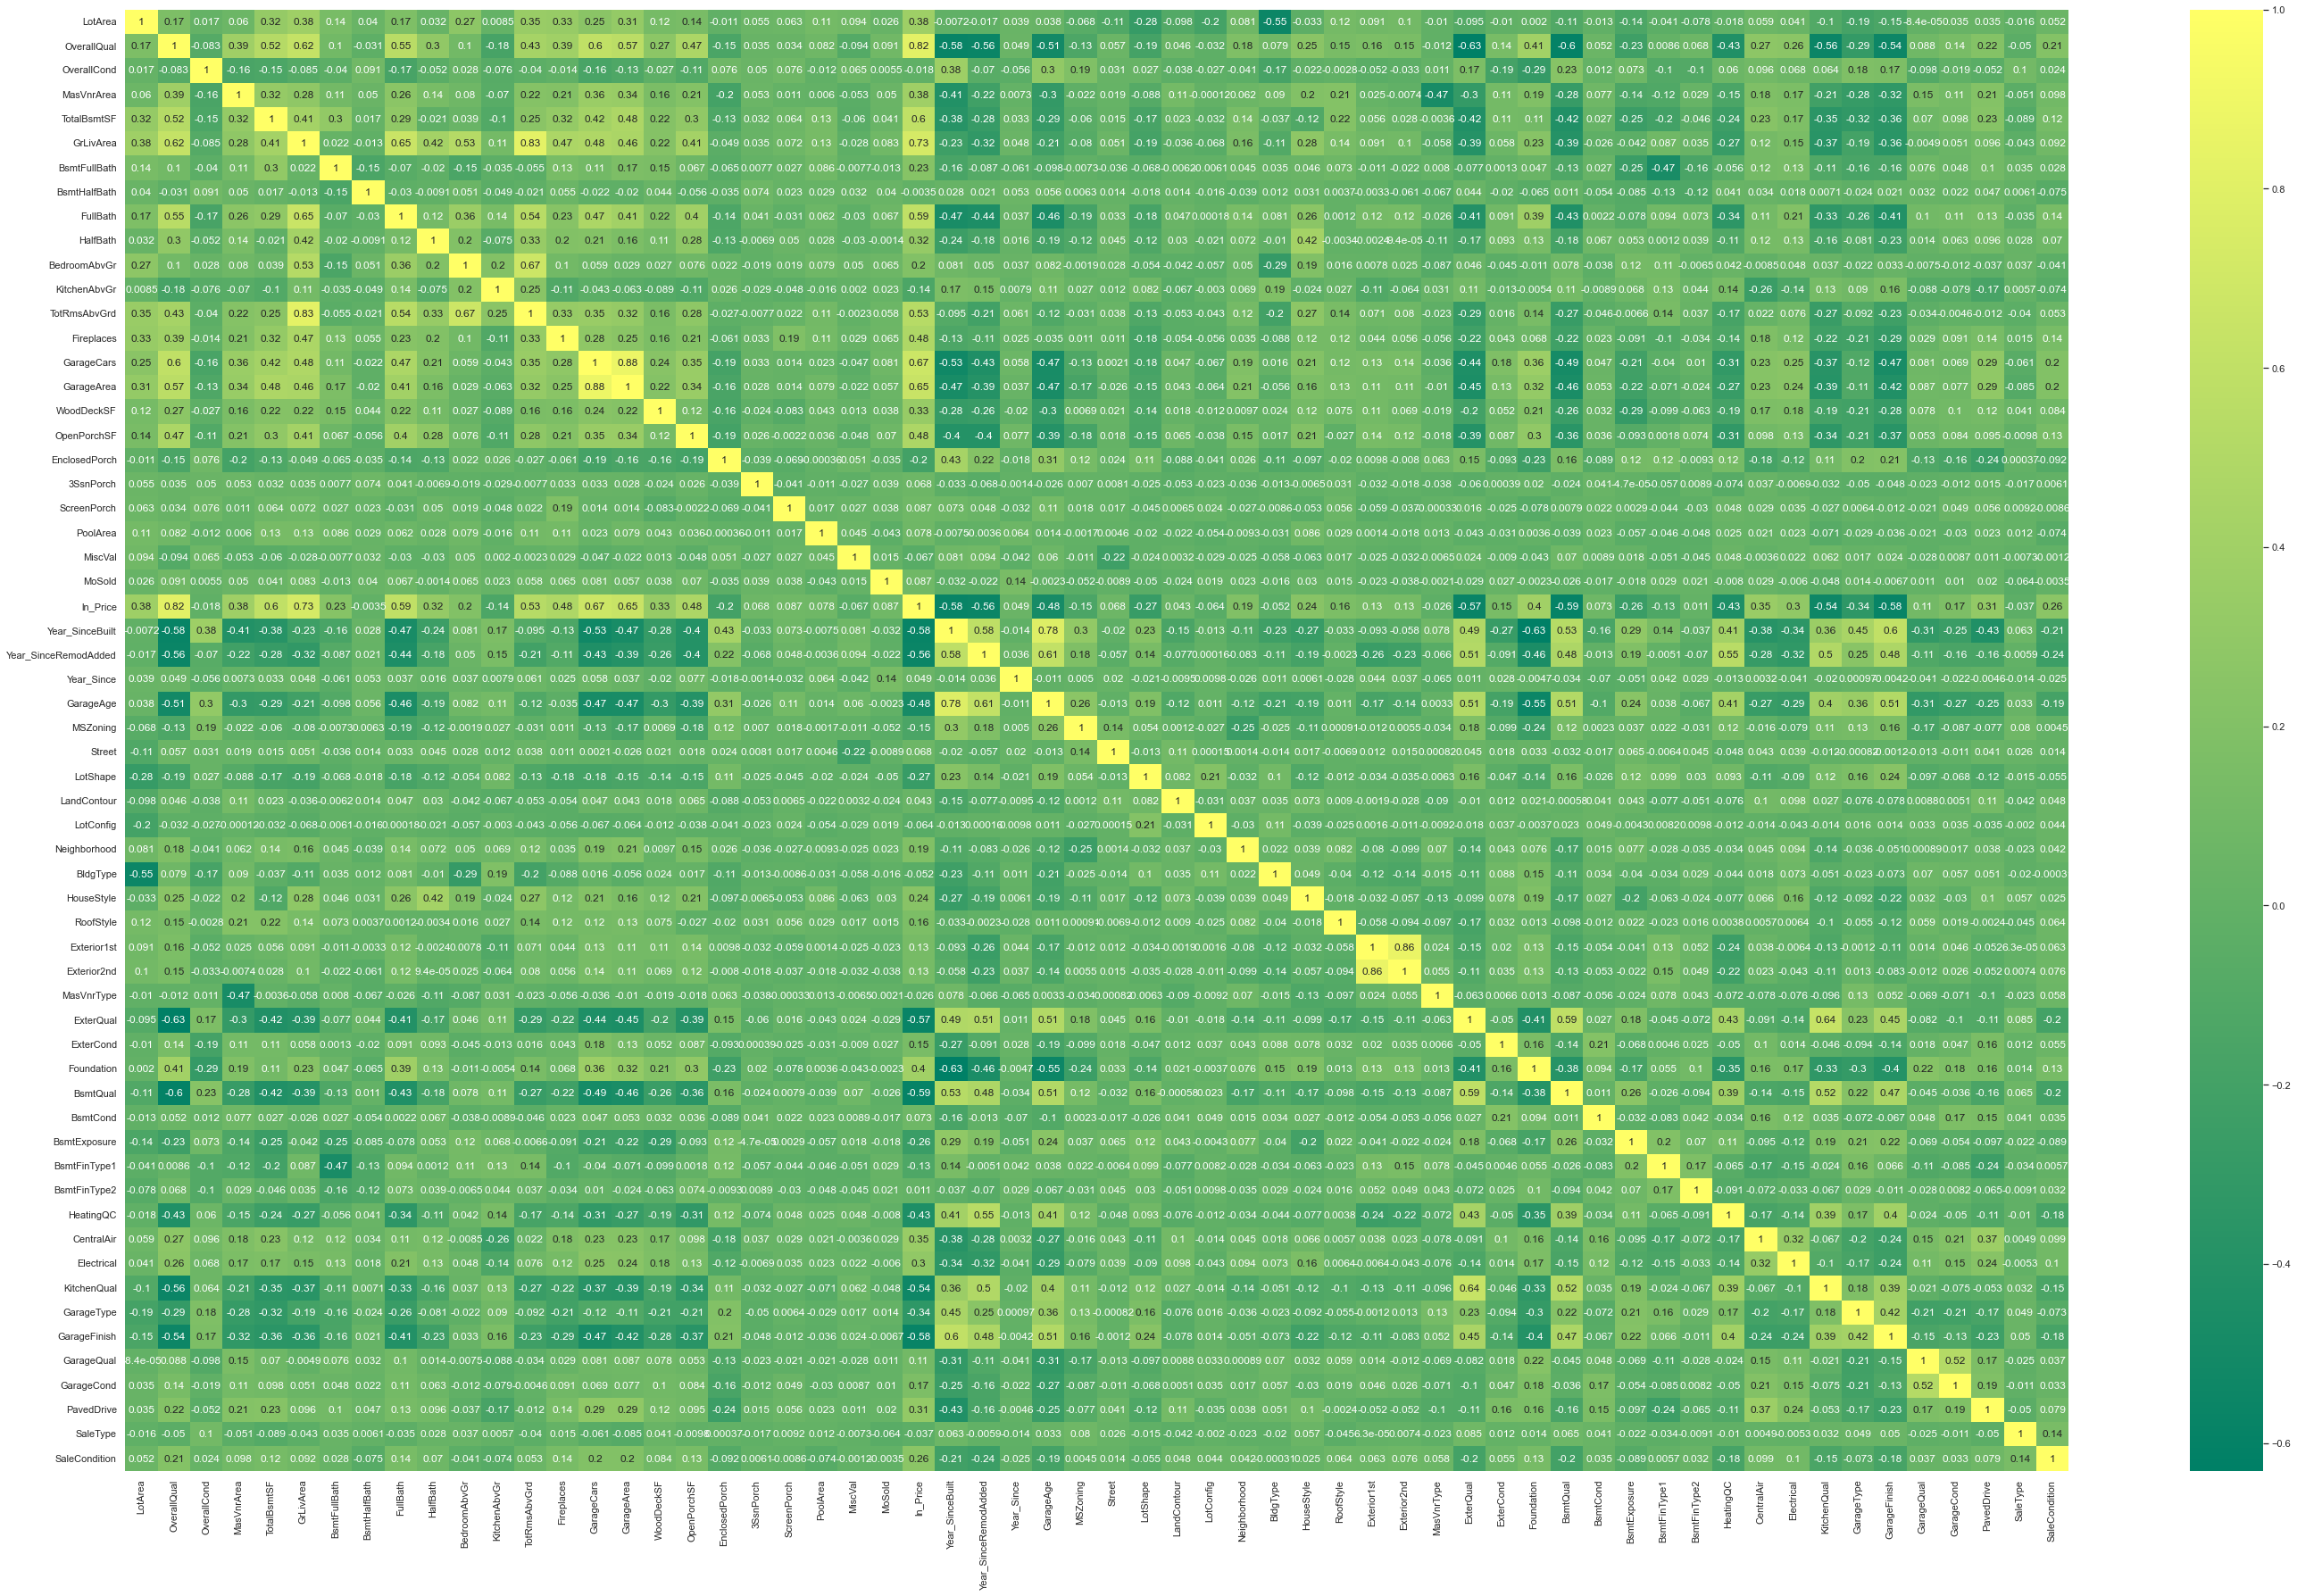

In [56]:
# heatmap correlation
plt.figure(figsize = (40,25))
sns.heatmap(train_final.corr(), annot=True,cmap='summer')
plt.show()

In [57]:
# Linearity: correlation matrix (ranges from 1 to -1)
# get it in ecxel to see it better 
corr_matrix = train_final.corr()
#corr_matrix.to_excel('corrm.xlsx')

In [58]:
# Drop these features in train & test data after checking out the correlation matrix in excel
train_final.drop(columns=['GarageArea','TotRmsAbvGrd','GarageAge'],inplace=True)
test_final.drop(columns=['GarageArea','TotRmsAbvGrd','GarageAge'],inplace=True)

In [59]:
train_final.shape

(1168, 57)

-------------------------------------------------------------------------------------------------------------------------------

### Feature Reduction

#### RFE

In [60]:
X = train_final[train_final.columns.difference(['ln_Price'])]
y = train_final.ln_Price

In [61]:
rfe = RFE(LinearRegression(), n_features_to_select=25).fit(X,y)

In [62]:
l1_rfe = X.columns[rfe.get_support()]

In [63]:
l1_rfe

Index(['BsmtCond', 'BsmtFinType1', 'BsmtFullBath', 'BsmtQual', 'CentralAir',
       'Fireplaces', 'Foundation', 'FullBath', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'KitchenQual',
       'LotArea', 'MSZoning', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolArea', 'SaleCondition', 'Street', 'TotalBsmtSF',
       'Year_SinceRemodAdded'],
      dtype='object')

-------------------------------------------------------------------------------------------------------------------------------

#### F-regression

In [64]:
F_values, p_values  = f_regression(X, y )

In [65]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(X.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [66]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(30)

In [67]:
f_reg_results

Variable      F_Value P_Value
27             HeatingQC   269.635714   0.000
24            GarageType   149.380547   0.000
25             GrLivArea  1325.769349   0.000
26              HalfBath   132.394781   0.000
54       Year_SinceBuilt   578.225177   0.000
28            HouseStyle    70.012177   0.000
29          KitchenAbvGr    23.668299   0.000
30           KitchenQual   476.656643   0.000
32               LotArea   198.055501   0.000
34              LotShape    92.683435   0.000
35              MSZoning    26.842326   0.000
36            MasVnrArea   202.380264   0.000
40          Neighborhood    44.353581   0.000
41           OpenPorchSF   340.399200   0.000
43           OverallQual  2367.601155   0.000
44            PavedDrive   120.740235   0.000
46             RoofStyle    32.231794   0.000
47         SaleCondition    84.782378   0.000
51           TotalBsmtSF   643.550450   0.000
52            WoodDeckSF   146.391743   0.000
23            GarageQual    13.165328   0.000
22          GarageFinish   579.793304   0.000
55  Year_SinceRemodAdded   546.641296   0.000
20            GarageCars   958.023897   0.000
5           BsmtFinType1    20.399920   0.000
4           BsmtExposure    84.914671   0.000
9               BsmtQual   616.684137   0.000
10            CentralAir   158.495342   0.000
11            Electrical   113.899892   0.000
12         EnclosedPorch    50.223070   0.000

In [68]:
l2_fr=f_reg_results[:31]['Variable'].values

In [69]:
list(set(list(l1_rfe)+list(l2_fr)))

['MasVnrArea',
 'Foundation',
 'BsmtQual',
 'Year_SinceRemodAdded',
 'Electrical',
 'MSZoning',
 'GarageCond',
 'BsmtExposure',
 'BsmtFullBath',
 'EnclosedPorch',
 'FullBath',
 'TotalBsmtSF',
 'Fireplaces',
 'GarageFinish',
 'CentralAir',
 'LotArea',
 'LotShape',
 'OverallQual',
 'GarageQual',
 'KitchenAbvGr',
 'GarageCars',
 'GarageType',
 'OverallCond',
 'SaleCondition',
 'WoodDeckSF',
 'GrLivArea',
 'Year_SinceBuilt',
 'OpenPorchSF',
 'PoolArea',
 'HouseStyle',
 'PavedDrive',
 'RoofStyle',
 'HeatingQC',
 'Street',
 'HalfBath',
 'KitchenQual',
 'Neighborhood',
 'BsmtCond',
 'BsmtFinType1']

In [70]:
final_list= ['LotArea',
 'Year_SinceBuilt',
 'Neighborhood',
 'SaleCondition',
 'MasVnrArea',
 'BsmtExposure',
 'Fireplaces',
 'HeatingQC',
 'BsmtFullBath',
 'HalfBath',
 'LotShape',
 'BsmtFinType1',
 'GarageType',
 'HouseStyle',
 'KitchenQual',
 'Year_SinceRemodAdded',
 'GrLivArea',
 'Foundation',
 'CentralAir',
 'OverallCond',
 'RoofStyle',
 'KitchenAbvGr',
 'TotalBsmtSF',
 'BsmtQual',
 'GarageCars',
 'WoodDeckSF',
 'PoolArea',
 'OverallQual',
 'MSZoning',
 'GarageQual',
 'GarageFinish',
 'BsmtCond',
 'OpenPorchSF',
 'Electrical',
 'PavedDrive',
 'Street',
 'GarageCond',
 'FullBath',
 'EnclosedPorch']

#### VIF check Multicollinarity

In [71]:
X_new = X[final_list]
y = y

In [72]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [73]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

VIF_Factor              features
35  188.637736                Street
36   90.602463            GarageCond
27   66.345812           OverallQual
29   65.094296            GarageQual
19   45.749573           OverallCond
21   31.853357          KitchenAbvGr
28   30.758922              MSZoning
37   25.946201              FullBath
18   22.354144            CentralAir
34   21.092753            PavedDrive
31   20.196086              BsmtCond
33   17.605537            Electrical
1    17.115346       Year_SinceBuilt
23   16.557587              BsmtQual
14   15.772283           KitchenQual
24   14.421672            GarageCars
3    13.929232         SaleCondition
17    9.685381            Foundation
15    8.220492  Year_SinceRemodAdded
5     7.118897          BsmtExposure
30    6.699604          GarageFinish
2     6.119092          Neighborhood
13    5.809326            HouseStyle
11    5.094504          BsmtFinType1
20    4.500707             RoofStyle
12    4.092490            GarageType
16    4.033719             GrLivArea
10    3.433007              LotShape
9     3.025637              HalfBath
6     2.932805            Fireplaces
7     2.918821             HeatingQC
8     2.457508          BsmtFullBath
22    2.449609           TotalBsmtSF
0     1.571572               LotArea
32    1.540591           OpenPorchSF
4     1.438790            MasVnrArea
38    1.337374         EnclosedPorch
25    1.255259            WoodDeckSF
26    1.073169              PoolArea

In [74]:
# Note: i did not drop more features coz the accuracy decreased.

-------------------------------------------------------------------------------------------------------------------------------

#### Check best random_state

In [75]:
# Splitting data in target and dependent feature
#separating the dependent and independent variable for balancing the class
x=X_new
y = train_final['ln_Price']

In [76]:
X_new.shape

(1168, 39)

In [77]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(pred_train,y_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state ",i," The model performs very well")
        print("At random_state: ",i)
        print("Training R2_score is :-",round(r2_score(y_train,pred_train)*100,1))
        print("Testing R2_score is:-",round(r2_score(y_test,pred_test)*100,1),  '\n\n')

At random state  7  The model performs very well
At random_state:  7
Training R2_score is :- 88.8
Testing R2_score is:- 87.2 


At random state  17  The model performs very well
At random_state:  17
Training R2_score is :- 88.7
Testing R2_score is:- 87.4 


At random state  40  The model performs very well
At random_state:  40
Training R2_score is :- 88.9
Testing R2_score is:- 87.1 


At random state  53  The model performs very well
At random_state:  53
Training R2_score is :- 88.5
Testing R2_score is:- 87.1 


At random state  58  The model performs very well
At random_state:  58
Training R2_score is :- 88.5
Testing R2_score is:- 87.4 


At random state  93  The model performs very well
At random_state:  93
Training R2_score is :- 88.7
Testing R2_score is:- 87.5 


At random state  97  The model performs very well
At random_state:  97
Training R2_score is :- 88.7
Testing R2_score is:- 87.3 




-------------------------------------------------------------------------------------------------------------------------------

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=58)

##### Standarization of data

In [79]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

-------------------------------------------------------------------------------------------------------------------------------

## ML Algos

### LinearRegression

In [80]:
lr=LinearRegression()
lr.fit(x_train_sc,y_train)
pred_train=lr.predict(x_train_sc)
pred_test=lr.predict(x_test_sc)
score_train=r2_score(y_train,pred_train)
score_test=r2_score(y_test,pred_test)
mse = mean_squared_error(y_test, pred_test)
print('R2_Score_train: ',score_train)
print('R2_Score_test: ',score_test)
print('Mean absolute error :', mean_absolute_error(y_test,pred_test))
print('RMSE = ', np.sqrt(mse).round(4))

R2_Score_train:  0.8845627870917223
R2_Score_test:  0.8744775291604862
Mean absolute error : 0.09757936996349996
RMSE =  0.1369


#### Cross validation of the Model

In [81]:
for i in(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean= cv_score.mean()
    cv_std= cv_score.std()
    print(f'At Cross fold {i} the cv score mean is {cv_mean} and the cv score std is {cv_std}, testing accuracy score= {score_test}')
    print('\n')

At Cross fold 2 the cv score mean is 0.8521720406815334 and the cv score std is 0.011142464250633533, testing accuracy score= 0.8744775291604862


At Cross fold 10 the cv score mean is 0.8571136838625977 and the cv score std is 0.07597908469170463, testing accuracy score= 0.8744775291604862




In [82]:
X_scale = sc.fit_transform(x)

In [83]:
score = cross_val_score(lr,X_scale, y, cv=10)
print('\033[1m'+'Cross Validation Score :',lr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred_test)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.8571136838625979
Difference in R2 & CV Score: 1.7363845297888219


------------------------------------------------------------------------------------------------------------------------------

### Polynominal

In [84]:
poly=PolynomialFeatures(degree=3)
xtrain_poly=poly.fit_transform(x_train_sc)
xtest_poly=poly.transform(x_test_sc)

In [85]:
lr2=LinearRegression()
lr2.fit(xtrain_poly,y_train)

LinearRegression()

In [86]:
pred_train=lr2.predict(xtrain_poly)
pred_test=lr2.predict(xtest_poly)

In [87]:
r2_train = r2_score(y_train, pred_train)
print('The train R-square value is: ', r2_train.round(4))

The train R-square value is:  1.0


In [88]:
r2_test = r2_score(y_test, pred_test)
print('The test R-square value is: ', r2_test.round(4))

The test R-square value is:  0.7937


In [89]:
mse = mean_squared_error(y_test, pred_test)
print('Mean absolute error :', mean_absolute_error(y_test,pred_test))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.12140576453530225
RMSE =  0.1754


-------------------------------------------------------------------------------------------------------------------------------

In [90]:
# try Rideg and Lasso Regularization to prevent overfitting with polynomial degree=3

In [91]:
# Using Lasso regularization
tuned_parameters = [{'alpha': [0.001,0.01,0.1,0.003],'random_state':[58]}]

LassoCV = GridSearchCV(Lasso(),
                   tuned_parameters,
                   cv=10,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error',
                   verbose=2)

LassoCV.fit(xtrain_poly,y_train)

print('Best combination:', LassoCV.best_params_);

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best combination: {'alpha': 0.01, 'random_state': 58}


In [92]:
# Lasso model
Lasso=Lasso(alpha=0.01)
lasso_model=Lasso.fit(xtrain_poly,y_train)

train_pred=lasso_model.predict(xtrain_poly)
test_pred=lasso_model.predict(xtest_poly)

In [93]:
r_squared = r2_score(y_train, train_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.9462


In [94]:
r_squared = r2_score(y_test, test_pred)
print('The test R-square value is: ', r_squared.round(4))

The test R-square value is:  0.8553


In [95]:
mse = mean_squared_error(y_test, test_pred)
print('Mean absolute error :', mean_absolute_error(y_test,test_pred))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.09661152055263018
RMSE =  0.1469


In [96]:
# Croos_val_score
score = cross_val_score(Lasso,X_scale, y, cv=10)
print('\033[1m'+'Cross Validation Score :',Lasso,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,test_pred)*100)-(score.mean()*100))

Cross Validation Score : Lasso(alpha=0.01) :

Mean CV Score : 0.8633777210111357
Difference in R2 & CV Score: -0.8037291776595907


-------------------------------------------------------------------------------------------------------------------------------

In [97]:
# Using Ridge regularization
tuned_parameters = [{'alpha': [1.,10.,20.,30,35.]}]

RidgeCV = GridSearchCV(Ridge(),
                   tuned_parameters,
                   cv=10,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error',
                   verbose=2)

RidgeCV.fit(xtrain_poly,y_train)

print('Best combination:', RidgeCV.best_params_);

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best combination: {'alpha': 35.0}


In [98]:
# Ridge model
Ridge=Ridge(alpha=35)
ridge_model=Ridge.fit(xtrain_poly,y_train)

train_pred=ridge_model.predict(xtrain_poly)
test_pred=ridge_model.predict(xtest_poly)

In [99]:
r_squared = r2_score(y_train, train_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.9998


In [100]:
r_squared = r2_score(y_test, test_pred)
print('The test R-square value is: ', r_squared.round(4))

The test R-square value is:  0.8056


In [101]:
mse = mean_squared_error(y_test, test_pred)
print('Mean absolute error :', mean_absolute_error(y_test,test_pred))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.11479909862837664
RMSE =  0.1703


In [102]:
# Croos_val_score
score = cross_val_score(Ridge,X_scale, y, cv=10)
print('\033[1m'+'Cross Validation Score :',Ridge,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,test_pred)*100)-(score.mean()*100))

Cross Validation Score : Ridge(alpha=35) :

Mean CV Score : 0.8596716968067832
Difference in R2 & CV Score: -5.409653248978373


-------------------------------------------------------------------------------------------------------------------------------

### KNN

In [103]:
knn=KNeighborsRegressor()

In [104]:
knn_params={'n_neighbors':[5,7,9,11],'weights':['distance','uniform'],'metric':['manhatten','euclidean']}
knn_model= GridSearchCV(knn,knn_params,cv=10,n_jobs=-1,verbose=True).fit(x_train_sc,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [105]:
knn_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

In [106]:
knn_model = KNeighborsRegressor(n_neighbors=9, weights='distance',metric='euclidean').fit(x_train_sc, y_train)

In [107]:
train_pred=knn_model.predict(x_train_sc)
test_pred=knn_model.predict(x_test_sc)

In [108]:
r_squared = r2_score(y_train, train_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  1.0


In [109]:
r_squared = r2_score(y_test, test_pred)
print('The test R-square value is: ', r_squared.round(4))

The test R-square value is:  0.7877


In [110]:
mse = mean_squared_error(y_test, test_pred)
print('Mean absolute error :', mean_absolute_error(y_test,test_pred))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.12249927602769145
RMSE =  0.178


In [111]:
# Cross_val_score
score = cross_val_score(knn,X_scale, y, cv=10)
print('\033[1m'+'Cross Validation Score :',knn,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,test_pred)*100)-(score.mean()*100))

Cross Validation Score : KNeighborsRegressor() :

Mean CV Score : 0.7876301462591948
Difference in R2 & CV Score: 0.01032916048518473


-------------------------------------------------------------------------------------------------------------------------------

### SVM

In [116]:
svr=SVR(kernel='linear')

In [117]:
svr.fit(x_train_sc,y_train)

SVR(kernel='linear')

In [118]:
r_squared = r2_score(y_train, train_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  1.0


In [119]:
r_squared = r2_score(y_test, test_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.7877


In [120]:
mse = mean_squared_error(y_test, test_pred)
print('Mean absolute error :', mean_absolute_error(y_test,test_pred))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.12249927602769145
RMSE =  0.178


In [121]:
# Cross_val_score
score = cross_val_score(svr,X_scale, y, cv=10)
print('\033[1m'+'Cross Validation Score :',svr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,test_pred)*100)-(score.mean()*100))

Cross Validation Score : SVR(kernel='linear') :

Mean CV Score : 0.8629616490197367
Difference in R2 & CV Score: -7.522821115569002


-------------------------------------------------------------------------------------------------------------------------------

### Decision Tree Regressor

In [122]:
dtr=DecisionTreeRegressor()

In [123]:
dtr.fit(x_train_sc,y_train)

DecisionTreeRegressor()

In [124]:
train_pred=dtr.predict(x_train_sc)
test_pred=dtr.predict(x_test_sc)

In [125]:
r_squared = r2_score(y_train, train_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  1.0


In [126]:
r_squared = r2_score(y_test, test_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.643


In [127]:
mse = mean_squared_error(y_test, test_pred)
print('Mean absolute error :', mean_absolute_error(y_test,test_pred))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.16488604996456133
RMSE =  0.2308


In [128]:
# Cross_val_score
score = cross_val_score(dtr,X_scale, y, cv=10)
print('\033[1m'+'Cross Validation Score :',dtr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,test_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.713004572815519
Difference in R2 & CV Score: -7.001580158314312


-------------------------------------------------------------------------------------------------------------------------------

### Ensembles Techniques

### Bagging : RandomForest

In [129]:
rfr=RandomForestRegressor()

In [130]:
rfr.fit(x_train_sc,y_train)

RandomForestRegressor()

In [131]:
train_pred=rfr.predict(x_train_sc)
test_pred=rfr.predict(x_test_sc)

In [132]:
r_squared = r2_score(y_train, train_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.9803


In [133]:
r_squared = r2_score(y_test, test_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.8501


In [134]:
mse = mean_squared_error(y_test, test_pred)
print('Mean absolute error :', mean_absolute_error(y_test,test_pred))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.10180068567191776
RMSE =  0.1496


In [135]:
# Cross_val_score
score = cross_val_score(rfr,X_scale, y, cv=10)
print('\033[1m'+'Cross Validation Score :',rfr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,test_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.8613797105702938
Difference in R2 & CV Score: -1.125548671744582


-------------------------------------------------------------------------------------------------------------------------------

### Boosting

##### AdaBoostRegressor

In [136]:
adar=AdaBoostRegressor()

In [137]:
adar.fit(x_train_sc,y_train)

AdaBoostRegressor()

In [138]:
train_pred= adar.predict(x_train_sc)
test_pred= adar.predict(x_test_sc)

In [139]:
r_squared = r2_score(y_train, train_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.8681


In [140]:
r_squared = r2_score(y_test, test_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.8005


In [142]:
mse = mean_squared_error(y_test, test_pred)
print('Mean absolute error :', mean_absolute_error(y_test,test_pred))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.12155701278070667
RMSE =  0.1725


In [141]:
# Cross_val_score
score = cross_val_score(adar,X_scale, y, cv=10)
print('\033[1m'+'Cross Validation Score :',adar,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,test_pred)*100)-(score.mean()*100))

Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7954522662398535
Difference in R2 & CV Score: 0.505242505904647


-------------------------------------------------------------------------------------------------------------------------------

##### GradientBoost

In [143]:
gbr=GradientBoostingRegressor()

In [144]:
gbr.fit(x_train_sc,y_train)

GradientBoostingRegressor()

In [145]:
train_pred= gbr.predict(x_train_sc)
test_pred= gbr.predict(x_test_sc)

In [146]:
r_squared = r2_score(y_train, train_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.9635


In [147]:
r_squared = r2_score(y_test, test_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.8843


In [148]:
mse = mean_squared_error(y_test, test_pred)
print('Mean absolute error :', mean_absolute_error(y_test,test_pred))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.08939414470938882
RMSE =  0.1314


In [149]:
# Cross_val_score
score = cross_val_score(gbr,X_scale, y, cv=10)
print('\033[1m'+'Cross Validation Score :',gbr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,test_pred)*100)-(score.mean()*100))

Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8811804593722684
Difference in R2 & CV Score: 0.3162646156351059


-------------------------------------------------------------------------------------------------------------------------------

### XGBoost

In [150]:
xgb=xgboost.XGBRegressor()

In [151]:
xgb.fit(x_train_sc,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [152]:
train_pred= xgb.predict(x_train_sc)
test_pred= xgb.predict(x_test_sc)

In [153]:
r_squared = r2_score(y_train, train_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.9998


In [154]:
r_squared = r2_score(y_test, test_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.8426


In [155]:
mse = mean_squared_error(y_test, test_pred)
print('Mean absolute error :', mean_absolute_error(y_test,test_pred))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.1027122775973885
RMSE =  0.1532


In [156]:
# Cross_val_score
score = cross_val_score(xgb,X_scale, y, cv=10)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,test_pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) :

Mean CV Score : 0.855554252537833
Difference in R2 & CV Score: -1.2908279140952885


-------------------------------------------------------------------------------------------------------------------------------

##### Tunning the Final model  (Gradient Boost Regressor)

In [316]:
gbr_params={'n_estimators':[1200],'learning_rate':[0.009],'max_depth':[4],'subsample':[0.4],'min_samples_split':[25],
    'min_samples_leaf':[25],'random_state':[58]}

In [317]:
gbr_model=GridSearchCV(gbr,gbr_params,cv=10,n_jobs=-1,scoring='r2',verbose=True).fit(x_train_sc,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [318]:
gbr_model.best_params_

{'learning_rate': 0.009,
 'max_depth': 4,
 'min_samples_leaf': 25,
 'min_samples_split': 25,
 'n_estimators': 1200,
 'random_state': 58,
 'subsample': 0.4}

In [319]:
gbr_model=gbr_model.best_estimator_


In [320]:
train_pred=gbr_model.predict(x_train_sc)
test_pred=gbr_model.predict(x_test_sc)

In [321]:
r_squared = r2_score(y_train, train_pred)
print('The train R-square value is: ', r_squared.round(4))


The train R-square value is:  0.9241


In [322]:
r_squared = r2_score(y_test, test_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.8925


In [323]:
mse = mean_squared_error(y_test, test_pred)
print('Mean absolute error :', mean_absolute_error(y_test,test_pred))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.08485719037181733
RMSE =  0.1267


In [324]:
# Cross_val_score
score = cross_val_score(gbr_model,X_scale, y, cv=10)
print('\033[1m'+'Cross Validation Score :',gbr_model,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,test_pred)*100)-(score.mean()*100))

Cross Validation Score : GradientBoostingRegressor(learning_rate=0.009, max_depth=4, min_samples_leaf=25,
                          min_samples_split=25, n_estimators=1200,
                          random_state=58, subsample=0.4) :

Mean CV Score : 0.8804369766016034
Difference in R2 & CV Score: 1.2033211219053612


## Saving Final Model

In [325]:
#Saving the model using .pkl
import joblib
joblib.dump(gbr_model,"Housing_Price_Prediction.pkl")

['Housing_Price_Prediction.pkl']

In [327]:
# final test data to be used for testing our final Model.
test_final=test_final.loc[:,final_list]

In [328]:
test_final_sc=sc.fit_transform(test_final)

In [329]:
# Loading the saved model
model = joblib.load("Housing_Price_Prediction.pkl")

# Prediction
prediction = model.predict(test_final_sc)
prediction

array([12.82138192, 12.15779351, 12.50564981, 12.17835733, 12.27978503,
       11.34765527, 11.68383196, 12.71235611, 12.31362958, 11.99204419,
       11.22858036, 11.85420124, 11.68058339, 12.10404918, 12.67623026,
       11.89041803, 11.67137212, 11.7101058 , 12.05543891, 12.26158644,
       12.02780818, 11.85396236, 11.87289822, 11.2380174 , 11.40385924,
       11.75739949, 12.07720946, 11.90025609, 12.07623493, 11.3407805 ,
       11.90391922, 12.15186999, 12.36436878, 12.05888906, 11.56888724,
       12.02574609, 12.16374955, 11.65784684, 12.07132394, 11.92315842,
       11.49651866, 12.6894559 , 12.16843097, 12.20400687, 11.83505872,
       11.83123226, 11.72110042, 11.3387548 , 12.23356746, 12.72793776,
       11.91561546, 12.19871406, 11.37001385, 11.37590399, 12.5171304 ,
       11.63815813, 11.90672312, 12.11619084, 11.61550816, 12.41018289,
       11.39823158, 12.12820922, 11.83043601, 11.83526734, 12.25246211,
       11.35901424, 11.95608866, 12.28613998, 11.90787568, 11.96

In [330]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset
Test_data_Predication = pd.DataFrame()
Test_data_Predication['SalePrice']=np.exp(prediction)
Test_data_Predication.head()

SalePrice
0  370045.749518
1  190573.554294
2  269857.631464
3  194533.046640
4  215299.428933

In [332]:
Final_test_data = pd.concat([test, Test_data_Predication], axis=1)
Final_test_data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0         20       RL    14157   Pave      IR1         HLS    AllPub   
1        120       RL     5814   Pave      IR1         Lvl    AllPub   
2         20       RL    11838   Pave      Reg         Lvl    AllPub   
3         70       RL    12000   Pave      Reg         Bnk    AllPub   
4         60       RL    14598   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Corner       Gtl      StoneBr  ...             0         0           0   
1   CulDSac       Gtl      StoneBr  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Inside       Gtl      Crawfor  ...             0         0           0   
4   CulDSac       Gtl      Somerst  ...             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition      SalePrice  
0        0        0       7    2007        WD        Normal  370045.749518  
1        0        0       8    2009       COD       Abnorml  190573.554294  
2        0        0       6    2009        WD        Normal  269857.631464  
3        0        0       7    2009        WD        Normal  194533.046640  
4        0        0       1    2008        WD        Normal  215299.428933  

[5 rows x 74 columns]